In [5]:
import pandas as pd
import Bio 
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import os 
#import tqdm

In [6]:
# wang dataset 
# load the supplementary file with the sgRNA sequences and sgRNA names
supplementary_dir="/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/SupplementaryData/"

genomewide_sgRNA=pd.read_excel(supplementary_dir + "Supplementary_Data_3.xlsx")

# #Fitness scores of sgRNAs of essentiality screen 
sgRNAfitness_growth = pd.read_excel(supplementary_dir + 'Supplementary_Data_6.xlsx')
sgRNAfitness_growth.head()

#Fitness scores of sgRNAs of auxotrophy
sgRNAfitness_auxotrophy= pd.read_excel(supplementary_dir + 'Supplementary_Data_7.xlsx')
sgRNAfitness_auxotrophy.head()

#Fitness scores of sgRNAs of amino acid addition
sgRNAfitness_aminoacid = pd.read_excel(supplementary_dir + 'Supplementary_Data_8.xlsx')
sgRNAfitness_aminoacid.head()

#Fitness scores of sgRNAs of furfural addition
sgRNAfitness_furfural = pd.read_excel(supplementary_dir + 'Supplementary_Data_9.xlsx')
sgRNAfitness_furfural.head()

#Fitness scores of sgRNAs of isobutanol addition
sgRNAfitness_isobutanol= pd.read_excel(supplementary_dir + 'Supplementary_Data_10.xlsx')


/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and 

In [7]:
# rousset datasets
# load the supplementary file with the sgRNA sequences and sgRNA names
supplementary_rou="/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/Supplementary/"

#Fitness scores of sgRNAs of essentiality screen 
rou_sgRNAfitness_growth = pd.read_csv(supplementary_rou + "01_sgRNAs_growthLC_E75_screen.csv")
# Fitness scores of sgRNA of phage screen 
rou_sgRNAfitness_phage =  pd.read_csv(supplementary_rou + "04_sgRNAs_phages_screen.csv")

# Fitness scores of sgRNAs of transduction screen
rou_sgRNAfitness_transd = pd.read_csv(supplementary_rou + "06_sgRNAs_transduction_screen.csv")

print("roussetLCE-75:", len(rou_sgRNAfitness_growth)) 
print("phage:", len(rou_sgRNAfitness_phage))
print("transduction:", len(rou_sgRNAfitness_transd))


roussetLCE-75: 59246
phage: 17220
transduction: 17220


In [8]:
cui_sgRNA_growth = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/Supplementary/05_Screenresults.csv")
print("cuiLCE18 ", len(cui_sgRNA_growth))


cuiLCE18  85381


In [9]:
bikard_supplementary=pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/gkaa294_supplemental_files/Supp_data2_log2FC.csv")
len(bikard_supplementary)

bikard_supplementary_control=bikard_supplementary[(bikard_supplementary['gene'].str.contains("Control")) & (~(bikard_supplementary['gene'].isna()))] 
# Bikard data without control
bikard_supplementary_withoutNC=pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/gkaa294_supplemental_files/Supp_data2_log2FC_minusControl.csv")

In [10]:
print("total gRNAs in Bikard LCE75:", len(bikard_supplementary))
print("controls in Bikard LCE75:", len(bikard_supplementary_control))
print("gRNAs in Bikard LCE75 without controls:", len(bikard_supplementary_withoutNC))

total gRNAs in Bikard LCE75: 21259
controls in Bikard LCE75: 99
gRNAs in Bikard LCE75 without controls: 21160


In [11]:
# wang datasets 
len(sgRNAfitness_growth), len(sgRNAfitness_auxotrophy),\
len(sgRNAfitness_aminoacid), len(sgRNAfitness_furfural), len(sgRNAfitness_isobutanol)

(54116, 48308, 48308, 48308, 48308)

/tmp/ipykernel_48/1461637337.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(rou_sgRNAfitness_growth['log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now depre

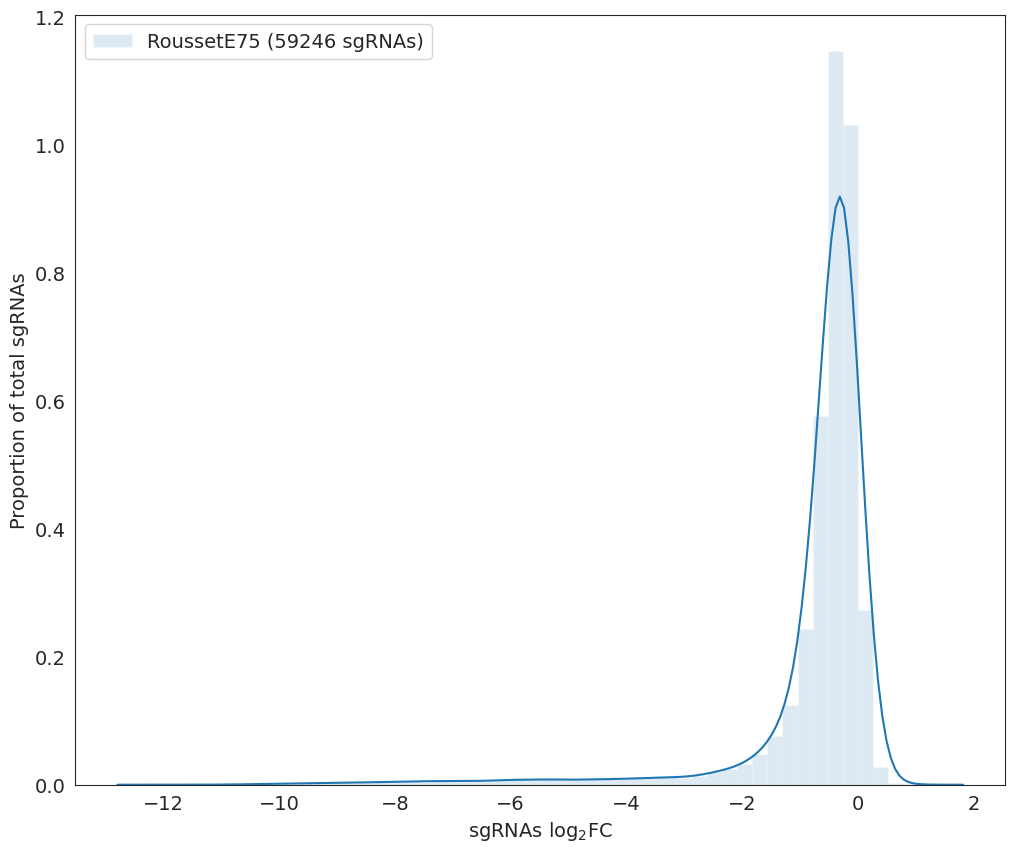

In [12]:
### sgRNA distribution plots of the Rousset screens 
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(12,10))
ax=sns.distplot(rou_sgRNAfitness_growth['log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'growth (%s sgRNAs)'%len(rou_sgRNAfitness_growth))
sns.distplot(rou_sgRNAfitness_phage['log2FC_186'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'phage 186 (%s sgRNAs)'%len(rou_sgRNAfitness_phage))
sns.distplot(rou_sgRNAfitness_phage['log2FC_lambda'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'phage $\lambda$ (%s sgRNAs) '%len(rou_sgRNAfitness_phage))
sns.distplot(rou_sgRNAfitness_phage['log2FC_T4'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'phage T4 (%s sgRNAs)'%len(rou_sgRNAfitness_phage))


plt.legend(loc='upper left',fontsize=14)
plt.xlabel("sgRNAs log$_2$FC",fontsize=14)
plt.ylabel("Proportion of total sgRNAs",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/Results_images/Roussetdist_plots_sgRNA.svg")
plt.show()

/tmp/ipykernel_344/698796721.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cui_sgRNA_growth['fit18'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in

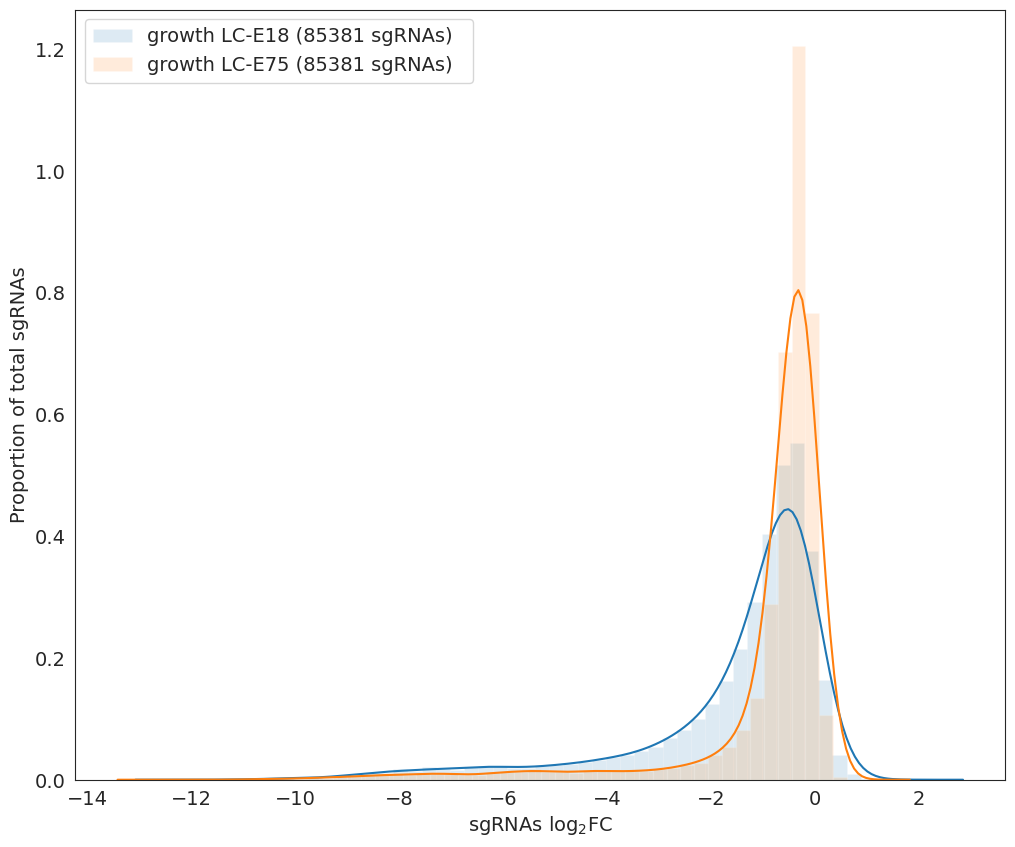

In [6]:
### sgRNA distribution plots of the LC-E18 and LC-E75
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(12,10))
ax=sns.distplot(cui_sgRNA_growth['fit18'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'growth LC-E18 (%s sgRNAs)  '%len(cui_sgRNA_growth))
sns.distplot(cui_sgRNA_growth['fit75'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'growth LC-E75 (%s sgRNAs) '%len(cui_sgRNA_growth))

plt.legend(loc='upper left',fontsize=14)
plt.xlabel("sgRNAs log$_2$FC",fontsize=14)
plt.ylabel("Proportion of total sgRNAs",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/Results_images/Cuidist_plots_sgRNA.svg")
plt.show()


In [7]:
# count the guides with no gene and coding mapping: targeting intergenic regions 
NC_Cui_sgRNA_growth = cui_sgRNA_growth[cui_sgRNA_growth['gene'].isna() 
                                                   & cui_sgRNA_growth['coding'].isna()]
print("Intergenic in Cui dataset as per the paper:", len(NC_Cui_sgRNA_growth))


Intergenic in Cui dataset: 7428


In [9]:
# wang datsets  with negative controls

NCsgRNAfitness_growth = sgRNAfitness_growth[sgRNAfitness_growth["sgRNA"].str.contains("NC_") == True]
NCsgRNAfitness_aminoacid = sgRNAfitness_aminoacid[sgRNAfitness_aminoacid["sgRNA"].str.contains("NC_")== True]
NCsgRNAfitness_auxotrophy =sgRNAfitness_auxotrophy[sgRNAfitness_auxotrophy["sgRNA"].str.contains("NC_")== True]
NCsgRNAfitness_furfural = sgRNAfitness_furfural[sgRNAfitness_furfural["sgRNA"].str.contains("NC_")== True]
NCsgRNAfitness_isobutanol = sgRNAfitness_isobutanol[sgRNAfitness_isobutanol["sgRNA"].str.contains("NC_")== True]

In [11]:
# wang datasets: number of negative controls
len(NCsgRNAfitness_growth), len(NCsgRNAfitness_auxotrophy),\
len(NCsgRNAfitness_aminoacid), len(NCsgRNAfitness_furfural), len(NCsgRNAfitness_isobutanol)

(398, 386, 386, 386, 386)

In [12]:
# rousset datasets: check if guides target no coding strand of the gene and targets no gene, ie targets intergenic regions  
NCrou_sgRNAfitness_growth = rou_sgRNAfitness_growth[rou_sgRNAfitness_growth["gene"].isna()]
NCrou_sgRNAfitness_phage = rou_sgRNAfitness_phage[rou_sgRNAfitness_phage["gene"].isna()]
NCrou_sgRNafitness_transd = rou_sgRNAfitness_transd[rou_sgRNAfitness_transd["gene"].isna()]
# number of guides with no gene targeting:

len(NCrou_sgRNAfitness_growth), len(NCrou_sgRNAfitness_phage), len(NCrou_sgRNafitness_transd)


(5063, 0, 0)

In [13]:
# wang datasets remove the negative controls 
sgRNAfitness_growth = sgRNAfitness_growth[sgRNAfitness_growth["sgRNA"].str.contains("^NC_") == False]
sgRNAfitness_aminoacid = sgRNAfitness_aminoacid[sgRNAfitness_aminoacid["sgRNA"].str.contains("^NC_")== False]
sgRNAfitness_auxotrophy =sgRNAfitness_auxotrophy[sgRNAfitness_auxotrophy["sgRNA"].str.contains("^NC_")== False]
sgRNAfitness_furfural = sgRNAfitness_furfural[sgRNAfitness_furfural["sgRNA"].str.contains("^NC_")== False]
sgRNAfitness_isobutanol = sgRNAfitness_isobutanol[sgRNAfitness_isobutanol["sgRNA"].str.contains("^NC")== False]

In [14]:
# wang datasets
len(sgRNAfitness_growth), len(sgRNAfitness_auxotrophy),len(sgRNAfitness_aminoacid), len(sgRNAfitness_furfural), len(sgRNAfitness_isobutanol)

(53718, 47922, 47922, 47922, 47922)

/tmp/ipykernel_344/3887262939.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sgRNAfitness_growth['sgRNA fitness'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now d

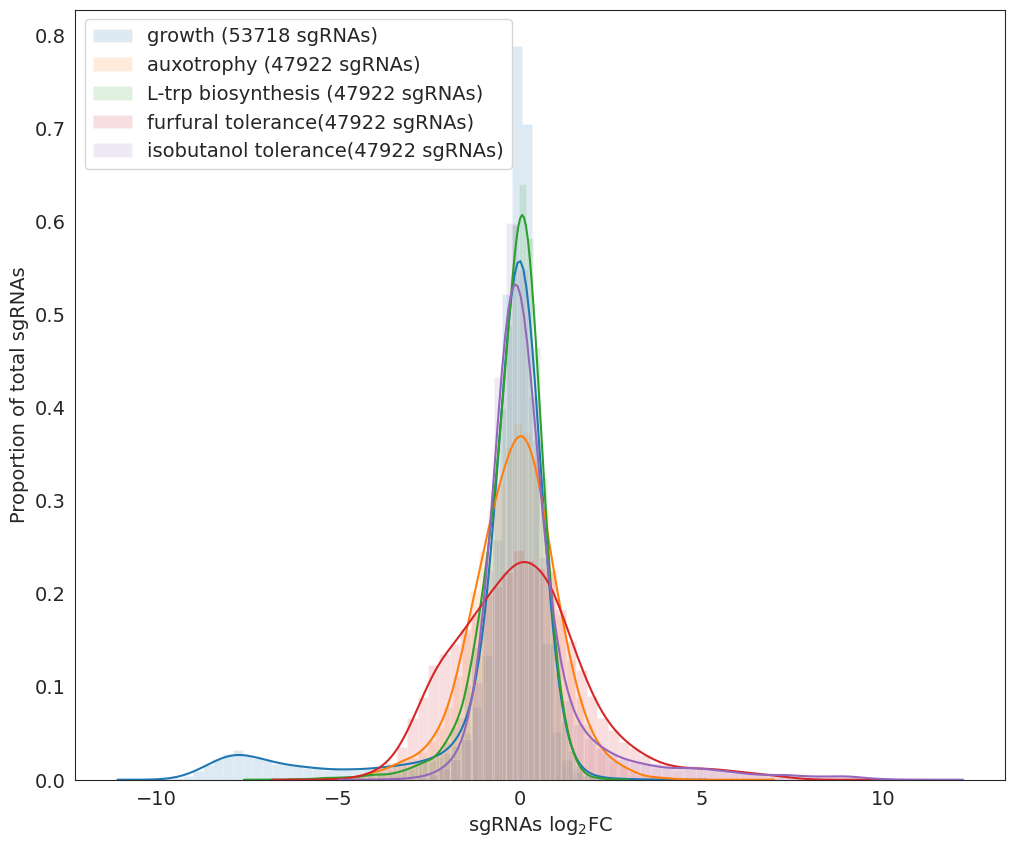

In [15]:
### sgRNA distribution plots of the Wang screens 
### the negative controls are removed 
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(12,10))
ax=sns.distplot(sgRNAfitness_growth['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'growth (%s sgRNAs)'%len(sgRNAfitness_growth))
sns.distplot(sgRNAfitness_auxotrophy['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'auxotrophy (%s sgRNAs)'%len(sgRNAfitness_auxotrophy))
sns.distplot(sgRNAfitness_aminoacid['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'L-trp biosynthesis (%s sgRNAs) '%len(sgRNAfitness_aminoacid))
sns.distplot(sgRNAfitness_furfural['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'furfural tolerance(%s sgRNAs)'%len(sgRNAfitness_furfural))
sns.distplot(sgRNAfitness_isobutanol['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'isobutanol tolerance(%s sgRNAs)'%len(sgRNAfitness_isobutanol))


plt.legend(loc='upper left',fontsize=14)
plt.xlabel("sgRNAs log$_2$FC",fontsize=14)
plt.ylabel("Proportion of total sgRNAs",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/Results_images/Wangdist_plots_sgRNA.svg")
plt.show()

/tmp/ipykernel_48/1438293795.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(rou_sgRNAfitness_growth['log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now depre

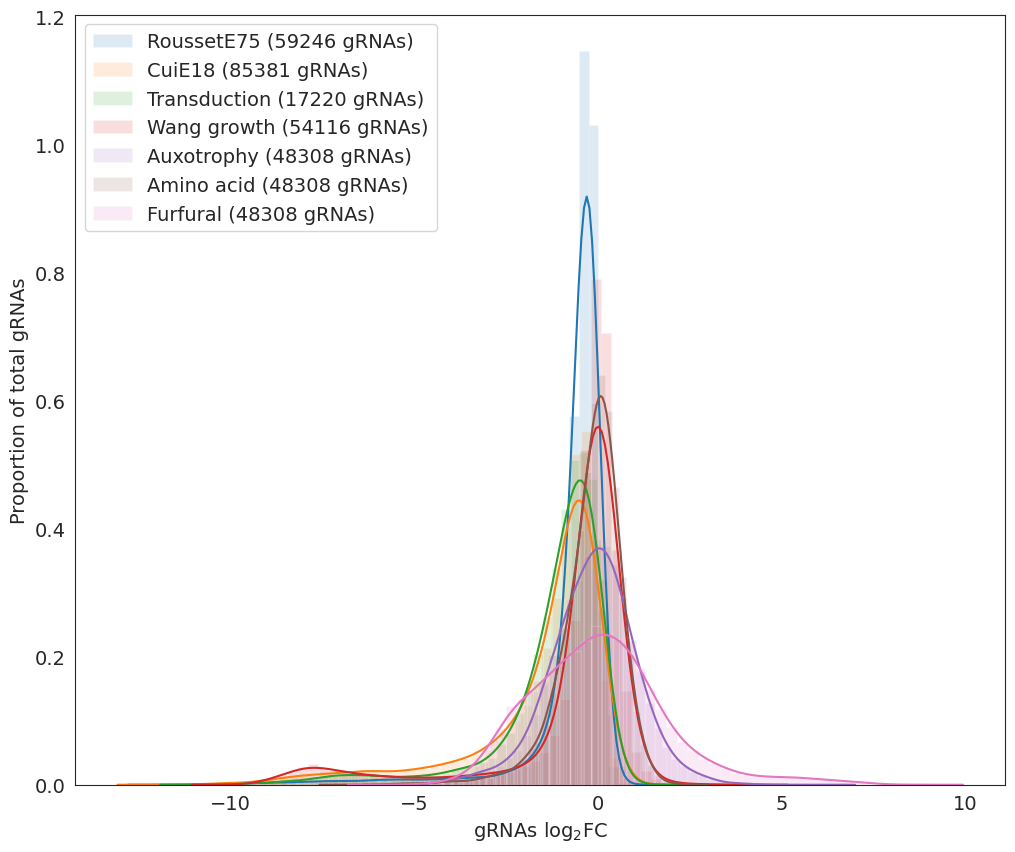

In [18]:
### sgRNA distribution plots of the 7 CRISPRi screens
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(12,10))
ax=sns.distplot(rou_sgRNAfitness_growth['log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'RoussetE75 (%s gRNAs)'%len(rou_sgRNAfitness_growth))
sns.distplot(cui_sgRNA_growth['fit18'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'CuiE18 (%s gRNAs)  '%len(cui_sgRNA_growth))
sns.distplot(rou_sgRNAfitness_transd['log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'Transduction (%s gRNAs)'%len(rou_sgRNAfitness_phage))
ax=sns.distplot(sgRNAfitness_growth['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'Wang growth (%s gRNAs)'%len(sgRNAfitness_growth))
sns.distplot(sgRNAfitness_auxotrophy['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'Auxotrophy (%s gRNAs)'%len(sgRNAfitness_auxotrophy))
sns.distplot(sgRNAfitness_aminoacid['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'Amino acid (%s gRNAs) '%len(sgRNAfitness_aminoacid))
sns.distplot(sgRNAfitness_furfural['sgRNA fitness'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15}, ax= ax,
              label = 'Furfural (%s gRNAs)'%len(sgRNAfitness_furfural))


plt.legend(loc='upper left',fontsize=14)
plt.xlabel("gRNAs log$_2$FC",fontsize=14)
plt.ylabel("Proportion of total gRNAs",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/CRISPRi_7screens.pdf")
plt.show()

In [20]:
### preprocessing results

# wang screen
aux_preprocess= pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Auxotrophy_screen/01_sgRNA_preprocessing_auxotrophyV2/00_processed_sgRNAlibrary.tsv", sep = "\t")
amino_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Aminoacid_screen/01_sgRNA_preprocessing_aminoacidV2/00_processed_sgRNAlibrary.tsv", sep = "\t")
furf_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Furfural_screen/01_sgRNA_preprocessing_furfuralV2/00_processed_sgRNAlibrary.tsv", sep= "\t")
isob_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Isobutanol_screen/01_sgRNA_preprocessing_isobutanolV2/00_processed_sgRNAlibrary.tsv", sep = "\t")
wang_growth_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Essentiality_screen/01_sgRNA_preprocessing_essentialityV2/00_processed_sgRNAlibrary.tsv", sep = "\t")

# cui screen 
cui_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/01_sgRNA_preprocessingV2/00_processed_sgRNAlibrary.tsv", sep = "\t")

# rousset screens
rou_growth_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_growth_LCE75_screen/01_sgRNA_preprocessing_growthV2/00_processed_sgRNAlibrary.tsv", sep = "\t")
rou_ph_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_phage_screen/01_sgRNA_preprocessing_phageV2/00_processed_sgRNAlibrary.tsv", sep = "\t")
rou_tr_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_transduction_screen/01_sgRNA_preprocessing_transductionV2/00_processed_sgRNAlibrary.tsv", sep = "\t")

# Bikard ontarget screen
bikard_preprocess = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/01_sgRNA_preprocessing_LC_E75_V2/00_processed_sgRNAlibrary.tsv", sep = "\t")

In [21]:
aux_preprocess.columns


Index(['sgRNA', 'gene', 'sgRNA fitness', 'Z score', 'Quality', 'guide',
       'geneid', 'genename', 'guide_strand', 'PAM', 'sequence_30nt',
       'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
       'intergenic', 'gene_biotype', 'geneid_trproduct'],
      dtype='object')

In [22]:
preprocess_list = [aux_preprocess, amino_preprocess, furf_preprocess, isob_preprocess, wang_growth_preprocess, 
                   cui_preprocess, rou_growth_preprocess, rou_ph_preprocess, rou_tr_preprocess, bikard_preprocess]

pnames = ["Wang auxotrophy", "Wang amino acid", "Wang furfural", "Wang isobutanol", "Wang growth", 
         "Cui essentiality", "Rousset growth", "Rousset phage", "Rousset transduction", "Bikard_preprocess"]

for i in range(len(preprocess_list)):
    print("guides targeting intergenic regions in", pnames[i], "screen:", preprocess_list[i]['intergenic'].isnull().values.ravel().sum())
    #print("guides mapping to gene_biotypes in",pnames[i], "screens:",  (preprocess_list[i].intergenic == 0.0).sum())
    print("guides targeting genes in",pnames[i], "screens:",  
          len(preprocess_list[i][(preprocess_list[i]['geneid'].str.contains("^b")== True)
                                 & (preprocess_list[i]['intergenic'] == 0.0)]))
    print("")

    

guides targeting intergenic regions in Wang auxotrophy screen: 183
guides targeting genes in Wang auxotrophy screens: 47739

guides targeting intergenic regions in Wang amino acid screen: 183
guides targeting genes in Wang amino acid screens: 47739

guides targeting intergenic regions in Wang furfural screen: 183
guides targeting genes in Wang furfural screens: 47739

guides targeting intergenic regions in Wang isobutanol screen: 183
guides targeting genes in Wang isobutanol screens: 47739

guides targeting intergenic regions in Wang growth screen: 212
guides targeting genes in Wang growth screens: 53506

guides targeting intergenic regions in Cui essentiality screen: 8954
guides targeting genes in Cui essentiality screens: 76427

guides targeting intergenic regions in Rousset growth screen: 5273
guides targeting genes in Rousset growth screens: 53973

guides targeting intergenic regions in Rousset phage screen: 68
guides targeting genes in Rousset phage screens: 17152

guides targetin

In [23]:
# remove the guides not targeting genes- remove guides targeting intergenic region
# wang dataset
aux_preprocess = aux_preprocess[((aux_preprocess['geneid'].str.contains("^s*$") == False)) &
                               ((aux_preprocess['intergenic'] == 0.0) & 
                                (aux_preprocess['geneid'].str.contains("^b")== True))]
aux_preprocess=aux_preprocess.reset_index()
aux_preprocess=aux_preprocess.drop(['index'], axis = 1)


amino_preprocess = amino_preprocess[((amino_preprocess['geneid'].str.contains("^s*$") == False)) & 
                                  ((amino_preprocess['intergenic'] == 0.0) & 
                                   (amino_preprocess['geneid'].str.contains("^b")== True))]
amino_preprocess=amino_preprocess.reset_index()
amino_preprocess=amino_preprocess.drop(['index'], axis = 1)

furf_preprocess = furf_preprocess[((furf_preprocess['geneid'].str.contains("^s*$") == False)) &
                                 ((furf_preprocess['intergenic'] == 0.0) & 
                                  (furf_preprocess['geneid'].str.contains("^b")== True))]
furf_preprocess=furf_preprocess.reset_index()
furf_preprocess=furf_preprocess.drop(['index'], axis = 1)


isob_preprocess = isob_preprocess[((isob_preprocess['geneid'].str.contains("^s*$") == False)) & 
                                ((isob_preprocess['intergenic'] == 0.0) & 
                                 (isob_preprocess['geneid'].str.contains("^b")== True)) ]
isob_preprocess= isob_preprocess.reset_index()
isob_preprocess=isob_preprocess.drop(['index'], axis = 1)

wang_growth_preprocess = wang_growth_preprocess[((wang_growth_preprocess['geneid'].str.contains("^s*$") == False)) &
                               ((wang_growth_preprocess['intergenic'] == 0.0) & 
                                (wang_growth_preprocess['geneid'].str.contains("^b")== True))]
wang_growth_preprocess= wang_growth_preprocess.reset_index()
wang_growth_preprocess=wang_growth_preprocess.drop(['index'], axis =1)

# cui dataset
cui_preprocess = cui_preprocess[((cui_preprocess['geneid'].str.contains("^s*$") == False)) &
                               ((cui_preprocess['intergenic'] == 0.0) &
                                (cui_preprocess['geneid'].str.contains("^b")== True))]
cui_preprocess= cui_preprocess.reset_index()
cui_preprocess=cui_preprocess.drop(['index'], axis = 1)

# rousset dataset
rou_growth_preprocess = rou_growth_preprocess[((rou_growth_preprocess['geneid'].str.contains("^s*$") == False)) &
                                  ((rou_growth_preprocess['intergenic'] == 0.0) & 
                                   (rou_growth_preprocess['geneid'].str.contains("^b")== True))]
rou_growth_preprocess=rou_growth_preprocess.reset_index()
rou_growth_preprocess=rou_growth_preprocess.drop(['index'], axis = 1)

rou_ph_preprocess = rou_ph_preprocess[((rou_ph_preprocess['geneid'].str.contains("^s*$") == False)) & 
                                      ((rou_ph_preprocess['intergenic'] == 0.0) & 
                                       (rou_ph_preprocess['geneid'].str.contains("^b")== True))]
rou_ph_preprocess=rou_ph_preprocess.reset_index()
rou_ph_preprocess=rou_ph_preprocess.drop(['index'], axis =1)

rou_tr_preprocess = rou_tr_preprocess[((rou_tr_preprocess['geneid'].str.contains("^s*$") == False)) & 
                                    ((rou_tr_preprocess['intergenic'] == 0.0) &
                                     (rou_tr_preprocess['geneid'].str.contains("^b")== True))]
rou_tr_preprocess=rou_tr_preprocess.reset_index()
rou_tr_preprocess=rou_tr_preprocess.drop(['index'], axis = 1)

print(len(aux_preprocess), len(amino_preprocess), len(furf_preprocess), len(isob_preprocess), len(wang_growth_preprocess))
print(len(cui_preprocess)) 
print(len(rou_growth_preprocess), len(rou_ph_preprocess), len(rou_tr_preprocess))


# bikard on target dataset 
bikard_preprocess = bikard_preprocess[((bikard_preprocess['geneid'].str.contains("^s*$") == False)) &
                                  ((bikard_preprocess['intergenic'] == 0.0) & 
                                   (bikard_preprocess['geneid'].str.contains("^b")== True))]
bikard_preprocess=bikard_preprocess.reset_index()
bikard_preprocess=bikard_preprocess.drop(['index'], axis = 1)
print(len(bikard_preprocess))

47739 47739 47739 47739 53506
76427
53973 17152 17152
20787


In [ ]:
# old preprocess file of auxotrophy
#aux_previouspreprocess=pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Auxotrophy_screen/01_sgRNA_preprocessing_auxotrophy/00_processed_sgRNAlibrary.tsv", sep = "\t")
#print(len(aux_previouspreprocess))
#aux_previouspreprocess = aux_previouspreprocess[((aux_previouspreprocess['geneid'].str.contains("^s*$") == False)) &
 #                              ((aux_previouspreprocess['intergenic'] == 0.0) & 
 #                               (aux_previouspreprocess['geneid'].str.contains("^b")== True))]
#aux_previouspreprocess=aux_previouspreprocess.reset_index()
#aux_previouspreprocess=aux_previouspreprocess.drop(['index'], axis = 1)
#print(len(aux_previouspreprocess))





In [ ]:
# diff between files of old preprocessing and preprocessing with new features
#seq_old=aux_previouspreprocess.guide
#seq_new = aux_preprocess.guide

#diff_seqs = aux_previouspreprocess[~(aux_previouspreprocess.guide.isin(seq_new))]
#diff_seqs

In [24]:
print(cui_preprocess['geneid'].duplicated().value_counts())
print(cui_preprocess['genename'].duplicated().value_counts()) # geneid and genename are same and don't
# have gene synonym affecting their total number 


geneid
True     72126
False     4301
Name: count, dtype: int64
genename
True     72126
False     4301
Name: count, dtype: int64


In [25]:
# guides targeting multiple genes or genomic regions  

print(cui_preprocess['guide'].duplicated().value_counts())
cui_preprocess

guide
False    71431
True      4996
Name: count, dtype: int64


,guide,gene,essential,pos,ori,coding,fit18,fit75,ntargets,seq,...,genename,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,gene_biotype,geneid_trproduct
0,AAAAAACGTATTCGCTTGCA,curA,False,1517891,+,False,-0.094026,-0.100313,1,TGTTGATGGCTACAGTGCTGAAAAAACGTATTCGCTTGCAAGGTTT...,...,curA,1.0,AGG,GCTGAAAAAACGTATTCGCTTGCAAGGTTT,819.0,78.901734,0.0,0.0,protein_coding,0.0
1,AAAAAAGCGGTGACTTACGA,bglA,False,3042929,+,False,-1.328831,-0.905068,1,GCGCCCATATCGAAGAGATGAAAAAAGCGGTGACTTACGATGGCGT...,...,bglA,1.0,TGG,GATGAAAAAAGCGGTGACTTACGATGGCGT,1224.0,85.000000,0.0,0.0,protein_coding,0.0
2,AAAAAATCTGCCCGTGTCGT,gyrA,True,2337231,-,False,-0.840373,-0.598858,1,ATGACTGGAACAAAGCCTATAAAAAATCTGCCCGTGTCGTTGGTGA...,...,gyrA,-1.0,TGG,CTATAAAAAATCTGCCCGTGTCGTTGGTGA,189.0,7.191781,0.0,0.0,protein_coding,0.0
3,AAAAAATGATGACGCAACGT,yadH,False,143931,-,True,-1.323535,-0.347105,1,TTACGCTGGAACTTGGCACCAAAAAATGATGACGCAACGTTGGCGT...,...,yadH,-1.0,TGG,CACCAAAAAATGATGACGCAACGTTGGCGT,232.0,30.090791,1.0,0.0,protein_coding,0.0
4,AAAAACAACCCGCTGCTGGT,clpA,False,923126,+,False,-0.529238,-0.421037,1,AGGTTCTCTGCCGTCGCCGTAAAAACAACCCGCTGCTGGTGGGGGA...,...,clpA,1.0,GGG,CCGTAAAAACAACCCGCTGCTGGTGGGGGA,618.0,27.140975,0.0,0.0,protein_coding,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76422,TTTTTTTAGCCCTTTTAGTC,yehI,False,2201224,-,True,0.209039,0.306176,1,TTGCTCACCTGAGTAGCATCTTTTTTTAGCCCTTTTAGTCGGGCCA...,...,yehI,-1.0,GGG,CATCTTTTTTTAGCCCTTTTAGTCGGGCCA,2926.0,80.539499,1.0,0.0,protein_coding,0
76423,TTTTTTTATCGACCGACCGC,araC,False,70506,+,False,0.064182,0.071936,1,GAGGCCAACGGTTATCTCGATTTTTTTATCGACCGACCGCTGGGAA...,...,araC,1.0,TGG,TCGATTTTTTTATCGACCGACCGCTGGGAA,98.0,11.149033,0.0,0.0,protein_coding,DNA-binding_transcriptional_dual_regulator
76424,TTTTTTTATGGCTGCCACAG,yeaN,False,1874259,+,False,0.525516,-0.001021,1,GTGTTTTCCTCTGCTGGCTCTTTTTTTATGGCTGCCACAGTGGCGA...,...,nimT,1.0,TGG,GCTCTTTTTTTATGGCTGCCACAGTGGCGA,541.0,45.769882,0.0,0.0,protein_coding,0
76425,TTTTTTTATTTGGTGGTCAT,yicL,False,3836952,+,False,0.244158,0.251729,1,ACGGCAGTTTGATTCTGGCGTTTTTTTATTTGGTGGTCATTGGTAC...,...,yicL,1.0,TGG,GGCGTTTTTTTATTTGGTGGTCATTGGTAC,660.0,71.428571,0.0,0.0,protein_coding,0


In [26]:
print(rou_growth_preprocess['guide'].duplicated().value_counts())

guide
False    53973
Name: count, dtype: int64


In [27]:
###1. Wang dataset: 
# median log2FC  per gene: essentiality
wang_growth_pergene_median = wang_growth_preprocess.groupby('geneid')['sgRNA fitness'].median()

# median log2FC per gene: auxotrophy 
auxotrophy_pergene_median = aux_preprocess.groupby('geneid')['sgRNA fitness'].median()

# median log2FC  per gene: furfural
furfural_pergene_median = furf_preprocess.groupby('geneid')['sgRNA fitness'].median()

# median log2FC per gene: amino acid 
amino_pergene_median = amino_preprocess.groupby('geneid')['sgRNA fitness'].median()

# median log2FC per gene: isobutanol
isob_pergene_median = isob_preprocess.groupby('geneid')['sgRNA fitness'].median()


###2. Rousset dataset: 
# median log2FC  per gene: essentiality
rou_growth_pergene_median = rou_growth_preprocess.groupby('geneid')['log2FC'].median()

# median log2FC  per gene: phage lambda
rou_phagelambda_pergene_median = rou_ph_preprocess.groupby('geneid')['log2FC_lambda'].median()

# median log2FC per gene: phage T4
rou_phageT4_pergene_median = rou_ph_preprocess.groupby('geneid')['log2FC_T4'].median()

# median log2FC per gene: phage 186
rou_phage186_pergene_median = rou_ph_preprocess.groupby('geneid')['log2FC_186'].median()

# median log2FC per gene: transduction screen
rou_transd_pergene_median = rou_tr_preprocess.groupby('geneid')['log2FC'].median()


###3. Cui dataset: 
# median log2FC per gene: essentiality LC-E75
cui_E75_pergene_median = cui_preprocess.groupby('geneid')['fit75'].median()

# median log2FC per gene: essentiality LC-E18
cui_E18_pergene_median = cui_preprocess.groupby('geneid')['fit18'].median()

##4. Bikard dataset: # only the first timepoint T1's log2FC is taken
bikard_ontarget_pergene_medianT1= bikard_preprocess.groupby('geneid')['T1'].median() 
bikard_ontarget_pergene_medianT2= bikard_preprocess.groupby('geneid')['T2'].median()
bikard_ontarget_pergene_medianT3= bikard_preprocess.groupby('geneid')['T3'].median()
bikard_ontarget_pergene_medianT4= bikard_preprocess.groupby('geneid')['T4'].median()

# list of the median log2FC genewise for each dataset
medianlogFC_genewise = [wang_growth_pergene_median, auxotrophy_pergene_median, # wang datasets
                       furfural_pergene_median, amino_pergene_median, isob_pergene_median,
                    rou_growth_pergene_median, # rousset datasets
                    rou_phagelambda_pergene_median, rou_phageT4_pergene_median,
                     rou_phage186_pergene_median, rou_transd_pergene_median, 
                       cui_E75_pergene_median, cui_E18_pergene_median,# cui datasets
                       bikard_ontarget_pergene_medianT1,bikard_ontarget_pergene_medianT2,  # bikard datasets
                        bikard_ontarget_pergene_medianT3, bikard_ontarget_pergene_medianT4 ] 

for i in range(len(medianlogFC_genewise)): 
    medianlogFC_genewise[i] = medianlogFC_genewise[i].to_frame()
    medianlogFC_genewise[i] = medianlogFC_genewise[i].reset_index()
    medianlogFC_genewise[i] = medianlogFC_genewise[i][medianlogFC_genewise[i]['geneid'] != 0]
    
    medianlogFC_genewise[i] = medianlogFC_genewise[i].rename(columns={medianlogFC_genewise[i].columns[1]: 'median_log2FC'})
    
    
wang_growth_pergene_median = medianlogFC_genewise[0]
auxotrophy_pergene_median = medianlogFC_genewise[1]
furfural_pergene_median = medianlogFC_genewise[2]
amino_pergene_median = medianlogFC_genewise[3]
isob_pergene_median = medianlogFC_genewise[4]
rou_growth_pergene_median = medianlogFC_genewise[5]
rou_phagelambda_pergene_median = medianlogFC_genewise[6]
rou_phageT4_pergene_median = medianlogFC_genewise[7]
rou_phage186_pergene_median = medianlogFC_genewise[8]
rou_transd_pergene_median = medianlogFC_genewise[9]
cui_E75_pergene_median = medianlogFC_genewise[10]
cui_E18_pergene_median = medianlogFC_genewise[11]
bikard_ontarget_pergene_medianT1= medianlogFC_genewise[12]
bikard_ontarget_pergene_medianT2= medianlogFC_genewise[13]
bikard_ontarget_pergene_medianT3=medianlogFC_genewise[14]
bikard_ontarget_pergene_medianT4=medianlogFC_genewise[15]


del medianlogFC_genewise[0:16] # remove all the dataframes stored in the list 


In [28]:
print(wang_growth_pergene_median.geneid.isna().value_counts()) # check if there are missing gene ids 
print(auxotrophy_pergene_median.geneid.isna().value_counts())
print(furfural_pergene_median.geneid.isna().value_counts())
print(amino_pergene_median.geneid.isna().value_counts())
print(isob_pergene_median.geneid.isna().value_counts())
print(rou_growth_pergene_median.geneid.isna().value_counts())
print(rou_phagelambda_pergene_median.geneid.isna().value_counts())
print(rou_phageT4_pergene_median.geneid.isna().value_counts())
print(rou_phage186_pergene_median.geneid.isna().value_counts())
print(rou_transd_pergene_median.geneid.isna().value_counts())
print(cui_E75_pergene_median.geneid.isna().value_counts())
print(cui_E18_pergene_median.geneid.isna().value_counts())

print(bikard_ontarget_pergene_medianT1.geneid.isna().value_counts())
print(bikard_ontarget_pergene_medianT2.geneid.isna().value_counts())
print(bikard_ontarget_pergene_medianT3.geneid.isna().value_counts())
print(bikard_ontarget_pergene_medianT4.geneid.isna().value_counts())


geneid
False    4126
Name: count, dtype: int64
geneid
False    3987
Name: count, dtype: int64
geneid
False    3987
Name: count, dtype: int64
geneid
False    3987
Name: count, dtype: int64
geneid
False    3987
Name: count, dtype: int64
geneid
False    4171
Name: count, dtype: int64
geneid
False    3676
Name: count, dtype: int64
geneid
False    3676
Name: count, dtype: int64
geneid
False    3676
Name: count, dtype: int64
geneid
False    3676
Name: count, dtype: int64
geneid
False    4301
Name: count, dtype: int64
geneid
False    4301
Name: count, dtype: int64
geneid
False    4263
Name: count, dtype: int64
geneid
False    4263
Name: count, dtype: int64
geneid
False    4263
Name: count, dtype: int64
geneid
False    4263
Name: count, dtype: int64


In [29]:
# check if the geneids are duplicated in the genewise median log2FC of guides 
print(cui_E75_pergene_median['geneid'].duplicated().value_counts())
print(cui_E18_pergene_median['geneid'].duplicated().value_counts())
len(cui_E18_pergene_median['geneid'].unique()), len(cui_E75_pergene_median['geneid'].unique())

geneid
False    4301
Name: count, dtype: int64
geneid
False    4301
Name: count, dtype: int64


(4301, 4301)

In [30]:
# number of genes targeted in each screens 
# wang screen 
print("Wang screens genes number")
print(len(wang_growth_pergene_median[(wang_growth_pergene_median['geneid'].str.contains('^s*$')== False)]))
print(len(auxotrophy_pergene_median[(auxotrophy_pergene_median['geneid'].str.contains('^s*$')== False)])) 
print(len(furfural_pergene_median[(furfural_pergene_median['geneid'].str.contains('^s*$')== False)]))
print(len(amino_pergene_median[ (amino_pergene_median['geneid'].str.contains('^s*$')== False)]))
print(len(isob_pergene_median[(isob_pergene_median['geneid'].str.contains('^s*$')== False)]))
# rousset screen 
print("Rousset screens genes number")
print(len(rou_growth_pergene_median[(rou_growth_pergene_median['geneid'].str.contains('^s*$')== False)]))

print(len(rou_phagelambda_pergene_median[(rou_phagelambda_pergene_median['geneid'].str.contains('^s*$')== False)]))

print(len(rou_phageT4_pergene_median[(rou_phageT4_pergene_median['geneid'].str.contains('^s*$')== False)]))

print(len(rou_phage186_pergene_median[(rou_phage186_pergene_median['geneid'].str.contains('^s*$')== False)]))

print(len(rou_transd_pergene_median[(rou_transd_pergene_median['geneid'].str.contains('^s*$')== False)]))

# cui screens 
print("Cui screens gene number")
print(len(cui_E75_pergene_median[(cui_E75_pergene_median['geneid'].str.contains('^s*$')== False)]))

print(len(cui_E18_pergene_median[(cui_E18_pergene_median['geneid'].str.contains('^s*$')== False)]))

# bikard ontarget screen
print("Bikard ontarget gene number")
print(len(bikard_ontarget_pergene_medianT1[(bikard_ontarget_pergene_medianT1['geneid'].str.contains('^s*$')==False)]))
print(len(bikard_ontarget_pergene_medianT2[(bikard_ontarget_pergene_medianT1['geneid'].str.contains('^s*$')==False)]))
print(len(bikard_ontarget_pergene_medianT3[(bikard_ontarget_pergene_medianT1['geneid'].str.contains('^s*$')==False)]))
print(len(bikard_ontarget_pergene_medianT4[(bikard_ontarget_pergene_medianT1['geneid'].str.contains('^s*$')==False)]))



Wang screens genes number
4126
3987
3987
3987
3987
Rousset screens genes number
4171
3676
3676
3676
3676
Cui screens gene number
4301
4301
Bikard ontarget gene number
4263
4263
4263
4263


In [31]:
len(cui_preprocess['genename'].unique()), len(cui_preprocess['geneid'].unique())

(4301, 4301)

In [27]:
###1. Wang dataset: 
# mean and standard deviation log2FC per gene: essentiality
wang_growth_pergene_mean = wang_growth_preprocess.groupby('geneid')['sgRNA fitness'].mean()
wang_growth_pergene_stdev = wang_growth_preprocess.groupby('geneid')['sgRNA fitness'].std()

# mean and standard deviation log2FC per gene: auxotrophy 
auxotrophy_pergene_mean = aux_preprocess.groupby('geneid')['sgRNA fitness'].mean()
auxotrophy_pergene_stdev = aux_preprocess.groupby('geneid')['sgRNA fitness'].std()

# mean and standard deviation log2FC  per gene: furfural
furfural_pergene_mean = furf_preprocess.groupby('geneid')['sgRNA fitness'].mean()
furfural_pergene_stdev = furf_preprocess.groupby('geneid')['sgRNA fitness'].std()

# mean and standard deviation log2FC per gene: amino acid 
amino_pergene_mean = amino_preprocess.groupby('geneid')['sgRNA fitness'].mean()
amino_pergene_stdev = amino_preprocess.groupby('geneid')['sgRNA fitness'].std()

# mean and standard deviation log2FC per gene: isobutanol
isob_pergene_mean = isob_preprocess.groupby('geneid')['sgRNA fitness'].mean()
isob_pergene_stdev = isob_preprocess.groupby('geneid')['sgRNA fitness'].std()


###2. Rousset dataset: 
# mean and standard deviation log2FC  per gene: essentiality
rou_growth_pergene_mean = rou_growth_preprocess.groupby('geneid')['log2FC'].mean()
rou_growth_pergene_stdev = rou_growth_preprocess.groupby('geneid')['log2FC'].std()
# mean and standard deviation log2FC  per gene: phage lambda
rou_phagelambda_pergene_mean = rou_ph_preprocess.groupby('geneid')['log2FC_lambda'].mean()
rou_phagelambda_pergene_stdev = rou_ph_preprocess.groupby('geneid')['log2FC_lambda'].std()
# mean and standard deviation log2FC per gene: phage T4
rou_phageT4_pergene_mean = rou_ph_preprocess.groupby('geneid')['log2FC_T4'].mean()
rou_phageT4_pergene_stdev = rou_ph_preprocess.groupby('geneid')['log2FC_T4'].std()
# mean and standard deviation log2FC per gene: phage 186
rou_phage186_pergene_mean = rou_ph_preprocess.groupby('geneid')['log2FC_186'].mean()
rou_phage186_pergene_stdev = rou_ph_preprocess.groupby('geneid')['log2FC_186'].std()

# mean and standard deviation log2FC per gene: transduction screen
rou_transd_pergene_mean = rou_tr_preprocess.groupby('geneid')['log2FC'].mean()
rou_transd_pergene_stdev = rou_tr_preprocess.groupby('geneid')['log2FC'].std()

###3. Cui dataset: 
# mean and standard deviation log2FC per gene: essentiality LC-E75
cui_E75_pergene_mean = cui_preprocess.groupby('geneid')['fit75'].mean()
cui_E75_pergene_stdev = cui_preprocess.groupby('geneid')['fit75'].std()

# mean and standard deviation log2FC per gene: essentiality LC-E18
cui_E18_pergene_mean = cui_preprocess.groupby('geneid')['fit18'].mean()
cui_E18_pergene_stdev = cui_preprocess.groupby('geneid')['fit18'].std()

# mean and standard deviation log2FC per gene: Bikard ontarget LC-E75 at time point T1
bikard_E75_pergene_meanT1 = bikard_preprocess.groupby('geneid')['T1'].mean()
bikard_E75_pergene_stdevT1 = bikard_preprocess.groupby('geneid')['T1'].std()

# mean and standard deviation log2FC per gene: Bikard ontarget LC-E75 at time point T2
bikard_E75_pergene_meanT2 = bikard_preprocess.groupby('geneid')['T2'].mean()
bikard_E75_pergene_stdevT2 = bikard_preprocess.groupby('geneid')['T2'].std()

# mean and standard deviation log2FC per gene: Bikard ontarget LC-E75 at time point T3
bikard_E75_pergene_meanT3 = bikard_preprocess.groupby('geneid')['T3'].mean()
bikard_E75_pergene_stdevT3 = bikard_preprocess.groupby('geneid')['T3'].std()

# mean and standard deviation log2FC per gene: Bikard ontarget LC-E75 at time point T4
bikard_E75_pergene_meanT4 = bikard_preprocess.groupby('geneid')['T4'].mean()
bikard_E75_pergene_stdevT4 = bikard_preprocess.groupby('geneid')['T4'].std()


# list of the mean log2FC genewise for each dataset
meanlogFC_genewise = [wang_growth_pergene_mean, auxotrophy_pergene_mean, # wang datasets
                       furfural_pergene_mean, amino_pergene_mean, isob_pergene_mean,
                    rou_growth_pergene_mean, # rousset datasets
                    rou_phagelambda_pergene_mean, rou_phageT4_pergene_mean,
                     rou_phage186_pergene_mean, rou_transd_pergene_mean, 
                       cui_E75_pergene_mean, cui_E18_pergene_mean, # cui datasets
                     bikard_E75_pergene_meanT1, bikard_E75_pergene_meanT2, 
                      bikard_E75_pergene_meanT3, bikard_E75_pergene_meanT4 ] 

# list of the mean log2FC genewise for each dataset
stdevlogFC_genewise = [wang_growth_pergene_stdev, auxotrophy_pergene_stdev, # wang datasets
                       furfural_pergene_stdev, amino_pergene_stdev, isob_pergene_stdev,
                    rou_growth_pergene_stdev, # rousset datasets
                    rou_phagelambda_pergene_stdev, rou_phageT4_pergene_stdev,
                     rou_phage186_pergene_stdev, rou_transd_pergene_stdev, 
                       cui_E75_pergene_stdev, cui_E18_pergene_stdev, # cui datasets
                      bikard_E75_pergene_stdevT1, bikard_E75_pergene_stdevT2, # bikard
                      bikard_E75_pergene_stdevT3, bikard_E75_pergene_stdevT4] 

stdev_meanlist= [0,0,0,0,0,0,0,0,0,0,0,0,0, 0,0,0]

for i in range(len(meanlogFC_genewise)): 
    meanlogFC_genewise[i] = meanlogFC_genewise[i].to_frame()
    meanlogFC_genewise[i] = meanlogFC_genewise[i].reset_index()
    meanlogFC_genewise[i] = meanlogFC_genewise[i][meanlogFC_genewise[i]['geneid'] != 0]
    meanlogFC_genewise[i] = meanlogFC_genewise[i].rename(columns={meanlogFC_genewise[i].columns[1]: 'mean'})
    
    stdevlogFC_genewise[i] = stdevlogFC_genewise[i].to_frame()
    stdevlogFC_genewise[i] = stdevlogFC_genewise[i].reset_index()
    stdevlogFC_genewise[i] = stdevlogFC_genewise[i][stdevlogFC_genewise[i]['geneid'] != 0]
    stdevlogFC_genewise[i] = stdevlogFC_genewise[i].rename(columns={stdevlogFC_genewise[i].columns[1]: 'stdev'})
    
    stdev_meanlist[i] = pd.merge(meanlogFC_genewise[i],stdevlogFC_genewise[i], on='geneid')

    
stdev_mean_wang_growth_pergene = stdev_meanlist[0]
stdev_mean_auxotrophy_pergene = stdev_meanlist[1]
stdev_mean_furfural_pergene = stdev_meanlist[2]
stdev_mean_amino_pergene = stdev_meanlist[3]
stdev_mean_isob_pergene = stdev_meanlist[4]
stdev_mean_rou_growth_pergene = stdev_meanlist[5]
stdev_mean_rou_phagelambda_pergene = stdev_meanlist[6]
stdev_mean_rou_phageT4_pergene = stdev_meanlist[7]
stdev_mean_rou_phage186_pergene = stdev_meanlist[8]
stdev_mean_rou_transd_pergene = stdev_meanlist[9]
stdev_mean_cui_E75_pergene = stdev_meanlist[10]
stdev_mean_cui_E18_pergene = stdev_meanlist[11]
stdev_mean_bikard_E75_pergeneT1 =stdev_meanlist[12]
stdev_mean_bikard_E75_pergeneT2 =stdev_meanlist[13]
stdev_mean_bikard_E75_pergeneT3 = stdev_meanlist[14]
stdev_mean_bikard_E75_pergeneT4 = stdev_meanlist[15]

del stdev_meanlist[0:16] # remove all the dataframes stored in the list 
del meanlogFC_genewise[0:16]
del stdevlogFC_genewise[0:16]

In [ ]:
wang_growth_pergene_mean

In [ ]:
# wang dataset for the mean and standard deviation plot genewise 
plt.figure(figsize=(8,6))
stdev_meanlist_wang= [stdev_mean_wang_growth_pergene,stdev_mean_auxotrophy_pergene,stdev_mean_furfural_pergene,
                 stdev_mean_amino_pergene,stdev_mean_isob_pergene]
names_stdev_wang = ['growth', 'auxotrophy', 'furfural', 'amino acid', 'isobutanol']
mark_stdev_wang = ['1', '2', '3', '4', '*']

for i in range(len(stdev_meanlist_wang)):
    ax=plt.scatter(stdev_meanlist_wang[i]['mean'], stdev_meanlist_wang[i]['stdev'], 
                   marker=mark_stdev_wang[i], alpha = 0.4)
    plt.legend(names_stdev_wang, fontsize=14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize=14)
    plt.xlabel("genewise $\mu$ Log$_2$FC", fontsize=14)
    plt.ylabel("genewise $\sigma$ Log$_2$FC", fontsize=14)
plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/Results_images/Wang_stdevVSmean_genewise.svg")
plt.show()
plt.close()
    

In [ ]:
wang_growth_pergene_stdev

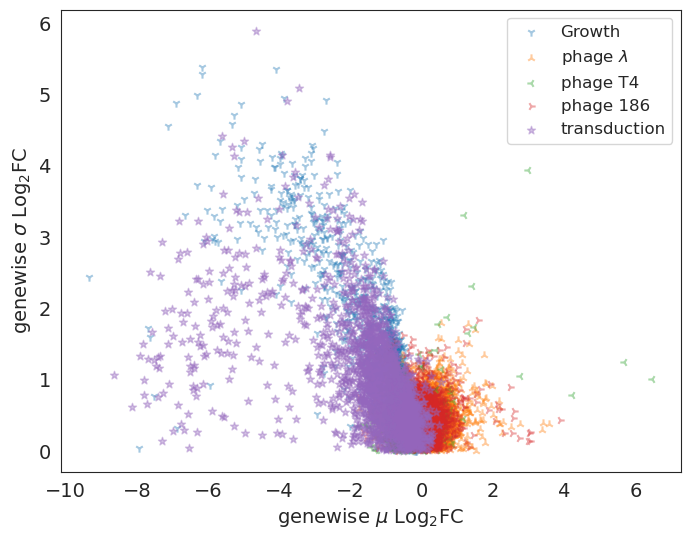

In [28]:
# rousset dataset for the mean and standard deviation plot genewise 
plt.figure(figsize=(8,6))
stdev_meanlist_rousset = [stdev_mean_rou_growth_pergene,stdev_mean_rou_phagelambda_pergene,
                          stdev_mean_rou_phageT4_pergene,stdev_mean_rou_phage186_pergene,
                          stdev_mean_rou_transd_pergene]
names_stdev_rousset=['Growth', 'phage $\lambda$', 'phage T4', 'phage 186',
                    'transduction']
mark_stdev_rousset = ['1', '2', '3', '4', '*']


for i in range(len(stdev_meanlist_rousset)):
    ax=plt.scatter(stdev_meanlist_rousset[i]['mean'], stdev_meanlist_rousset[i]['stdev'], 
                   marker=mark_stdev_rousset[i], alpha = 0.4)
    plt.legend(names_stdev_rousset, fontsize=12)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize=14)
    plt.xlabel("genewise $\mu$ Log$_2$FC", fontsize=14)
    plt.ylabel("genewise $\sigma$ Log$_2$FC", fontsize=14)
plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/Results_images/Rousset_stdevVSmean_genewise.svg")
plt.show()
plt.close()    
    

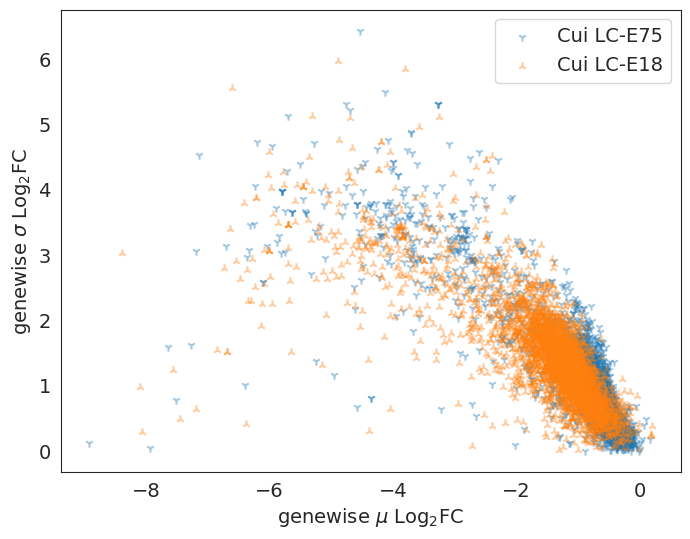

In [29]:
# cui dataset for the mean and standard deviation plot genewise 
plt.figure(figsize=(8,6))
stdev_meanlist_cui = [stdev_mean_cui_E75_pergene,stdev_mean_cui_E18_pergene]
names_stdev_cui = ['Cui LC-E75', 'Cui LC-E18']
mark_stdev_cui = ['1', '2']

for i in range(len(stdev_meanlist_cui)):
    ax=plt.scatter(stdev_meanlist_cui[i]['mean'], stdev_meanlist_cui[i]['stdev'], 
                   marker=mark_stdev_cui[i], alpha = 0.4)
    plt.legend(names_stdev_cui, fontsize=14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize=14)
    plt.xlabel("genewise $\mu$ Log$_2$FC", fontsize=14)
    plt.ylabel("genewise $\sigma$ Log$_2$FC ", fontsize=14)
plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/Results_images/Cui_stdevVSmean_genewise.svg")
plt.show()
plt.close()

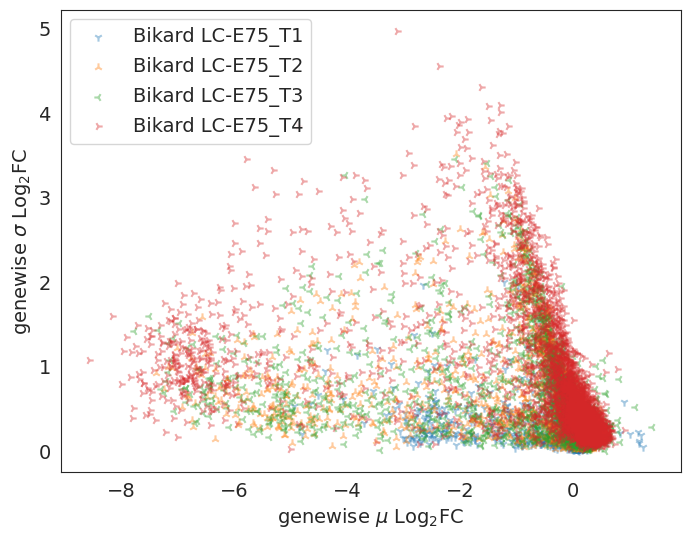

In [30]:
# bikard ontarget dataset for the mean and standard deviation plot genewise 
plt.figure(figsize=(8,6))
stdev_meanlist_bikard = [stdev_mean_bikard_E75_pergeneT1, stdev_mean_bikard_E75_pergeneT2, stdev_mean_bikard_E75_pergeneT3, 
                        stdev_mean_bikard_E75_pergeneT4]
names_stdev_bikard = ['Bikard LC-E75_T1', 'Bikard LC-E75_T2', 'Bikard LC-E75_T3', 'Bikard LC-E75_T4']
mark_stdev_bikard = ['1', '2', '3', '4']

for i in range(len(stdev_meanlist_bikard)):
    ax=plt.scatter(stdev_meanlist_bikard[i]['mean'], stdev_meanlist_bikard[i]['stdev'], 
                   marker=mark_stdev_bikard[i], alpha = 0.4)
    plt.legend(names_stdev_bikard, fontsize=14)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize=14)
    plt.xlabel("genewise $\mu$ Log$_2$FC", fontsize=14)
    plt.ylabel("genewise $\sigma$ Log$_2$FC ", fontsize=14)
plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/Results_images/Bikard_stdevVSmean_genewiseV2_morefeatures.svg")
plt.show()
plt.close()

/tmp/ipykernel_344/514980806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(wang_growth_pergene_median['median_log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is

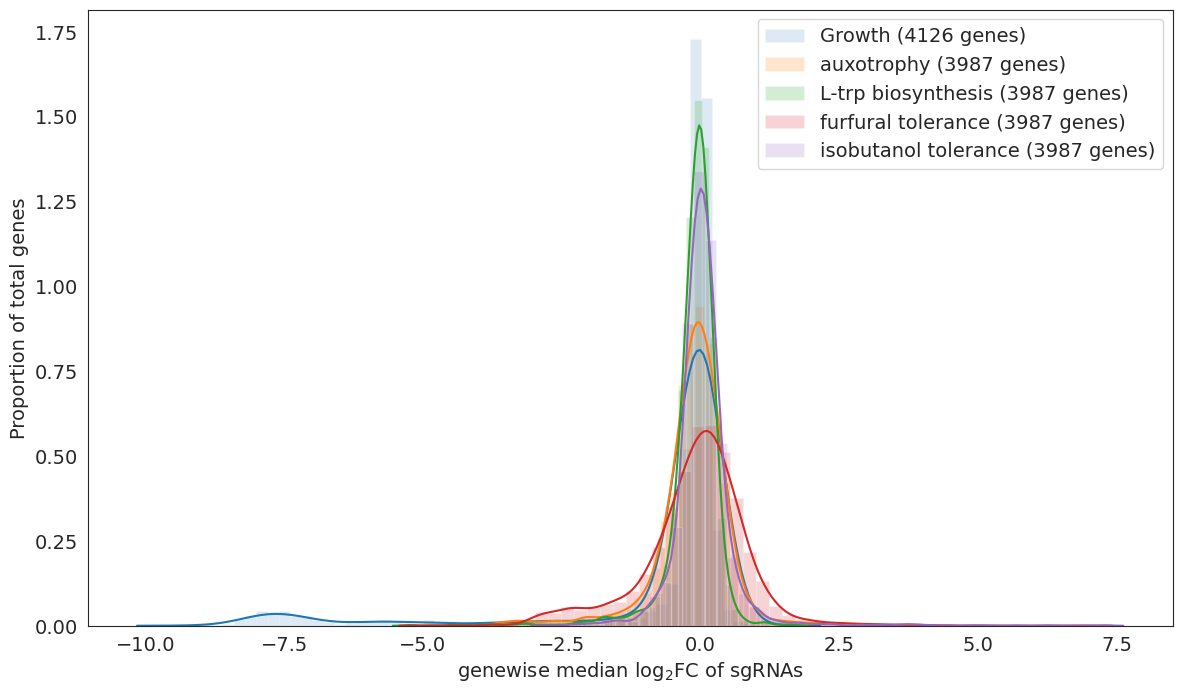

In [31]:
# the median log2FC genewise for each screen in Wang dataset
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(14,8))
ax=sns.distplot(wang_growth_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'Growth (%s genes)'%len(wang_growth_pergene_median))

sns.distplot(auxotrophy_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'auxotrophy (%s genes)'%len(auxotrophy_pergene_median))

sns.distplot(amino_pergene_median['median_log2FC'], ax= ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
           label = 'L-trp biosynthesis (%s genes)'%len(amino_pergene_median))
sns.distplot(furfural_pergene_median['median_log2FC'], ax=ax, 
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
           label = 'furfural tolerance (%s genes)'%len(furfural_pergene_median))

sns.distplot(isob_pergene_median['median_log2FC'],ax=ax, 
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
           label = 'isobutanol tolerance (%s genes)'%len(isob_pergene_median))

plt.legend(loc='upper right',fontsize=14)
plt.xlabel("genewise median log$_2$FC of sgRNAs",fontsize=14)
plt.ylabel("Proportion of total genes",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/Results_images/Wangdataset_medianlog2FCgenewise.svg",dpi=400)
plt.show()


/tmp/ipykernel_344/3156160284.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(rou_growth_pergene_median['median_log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is

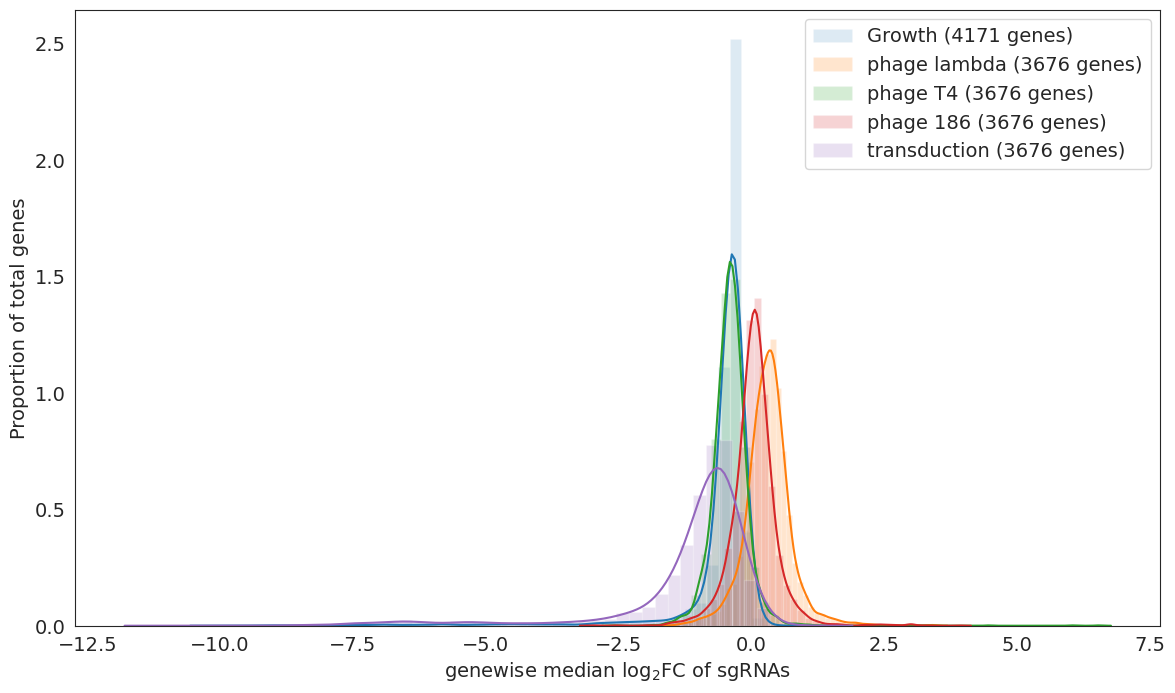

In [32]:
# median log2FC genewise for each screen in the Rousset screen 
sns.set_style(style='white') 
fig, ax= plt.subplots(figsize=(14,8))
ax=sns.distplot(rou_growth_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Growth (%s genes)'%len(rou_growth_pergene_median))

sns.distplot(rou_phagelambda_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'phage lambda (%s genes)'%len(rou_phagelambda_pergene_median))

sns.distplot(rou_phageT4_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'phage T4 (%s genes)'%len(rou_phageT4_pergene_median))

sns.distplot(rou_phage186_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'phage 186 (%s genes)'%len(rou_phage186_pergene_median))

sns.distplot(rou_transd_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'transduction (%s genes)'%len(rou_transd_pergene_median))

plt.legend(loc='upper right',fontsize=14)
plt.xlabel("genewise median log$_2$FC of sgRNAs",fontsize=14)
plt.ylabel("Proportion of total genes",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/Results_images/Roussetdataset_medianlog2FCgenewise.svg",dpi=400)
plt.show() 

/tmp/ipykernel_344/3295256463.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(cui_E18_pergene_median['median_log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is no

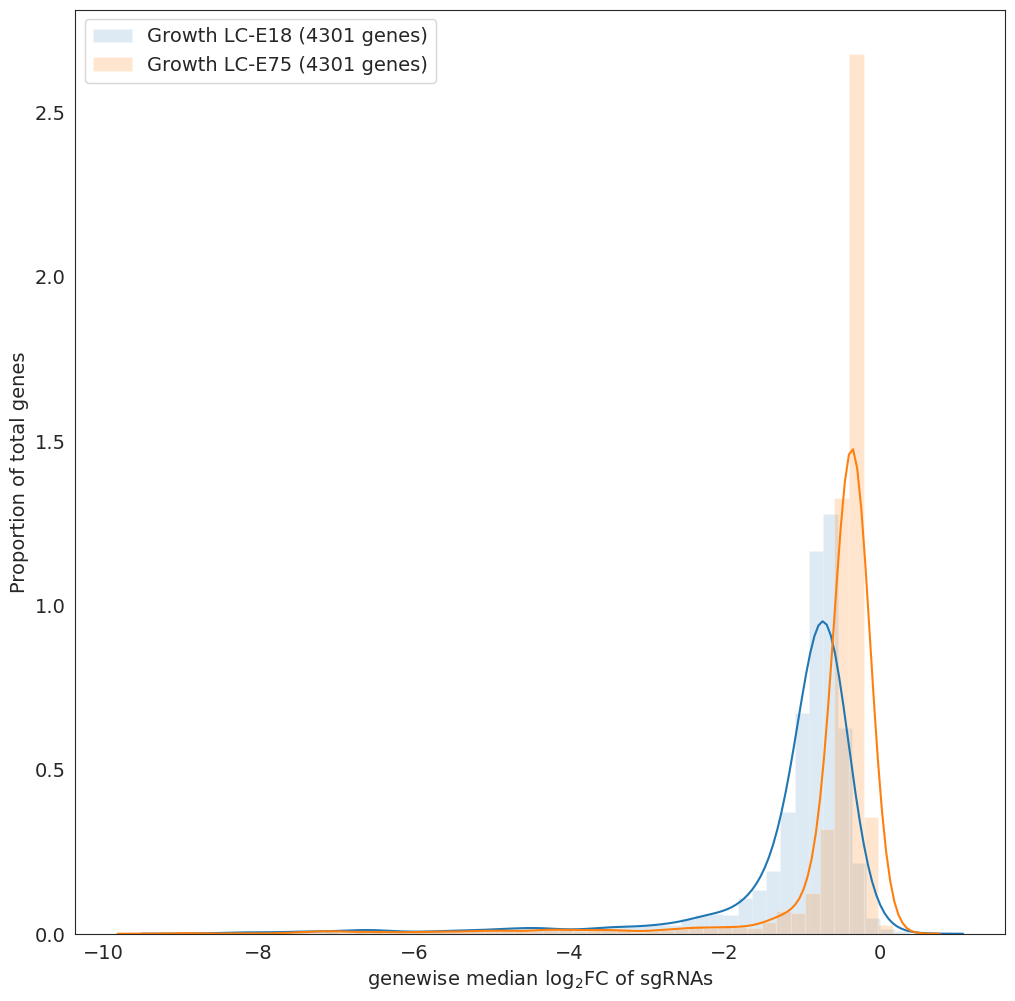

In [33]:
# median log2FC genewise for each screen in the Cui screens 
sns.set_style(style='white') 
fig, ax= plt.subplots(figsize=(12,12))

ax=sns.distplot(cui_E18_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Growth LC-E18 (%s genes)'%len(cui_E18_pergene_median))


sns.distplot(cui_E75_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'Growth LC-E75 (%s genes)'%len(cui_E75_pergene_median))


plt.legend(loc='upper left',fontsize=14)
plt.xlabel("genewise median log$_2$FC of sgRNAs",fontsize=14)
plt.ylabel("Proportion of total genes",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/Results_images/Cuidataset_medianlog2FCgenewise.svg",dpi=400)
plt.show()

/tmp/ipykernel_48/2208118255.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(wang_growth_pergene_median['median_log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is

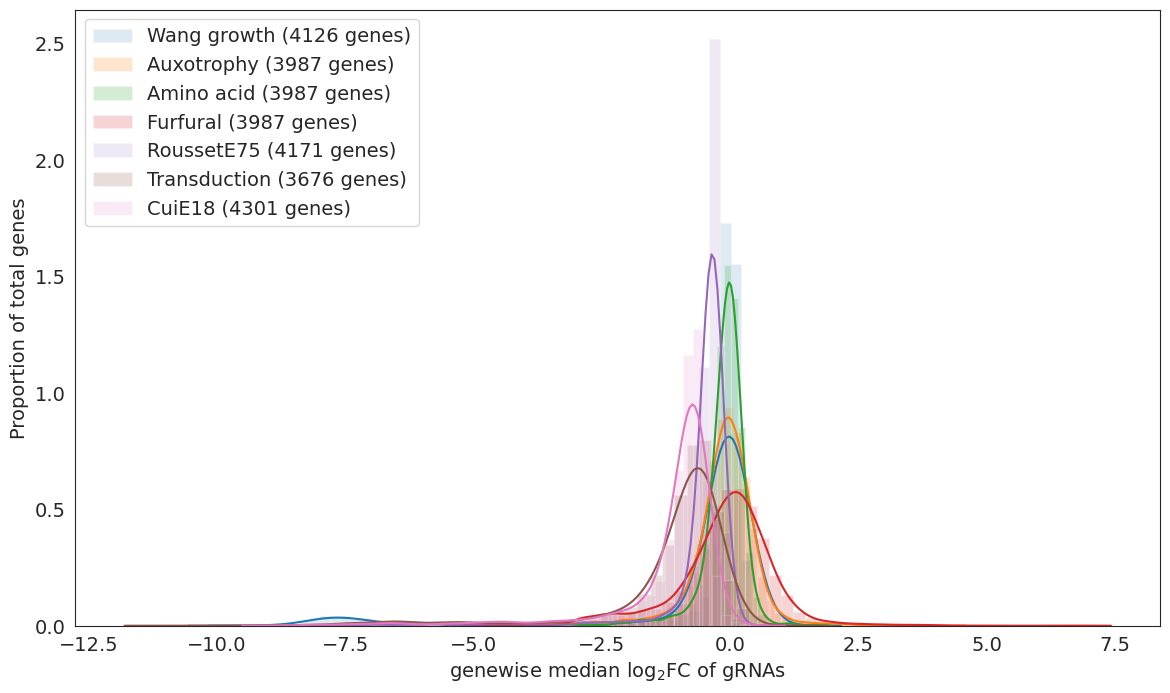

In [36]:
# median log2FC genewise for 7 screens
# the median log2FC genewise for each screen in Wang dataset
sns.set_style(style='white') 

fig, ax= plt.subplots(figsize=(14,8))
ax=sns.distplot(wang_growth_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
              label = 'Wang growth (%s genes)'%len(wang_growth_pergene_median))
sns.distplot(auxotrophy_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'Auxotrophy (%s genes)'%len(auxotrophy_pergene_median))
sns.distplot(amino_pergene_median['median_log2FC'], ax= ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
           label = 'Amino acid (%s genes)'%len(amino_pergene_median))
sns.distplot(furfural_pergene_median['median_log2FC'], ax=ax, 
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
           label = 'Furfural (%s genes)'%len(furfural_pergene_median))
sns.distplot(rou_growth_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'RoussetE75 (%s genes)'%len(rou_growth_pergene_median))
sns.distplot(rou_transd_pergene_median['median_log2FC'],  ax=ax,
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.2},
            label = 'Transduction (%s genes)'%len(rou_transd_pergene_median))
sns.distplot(cui_E18_pergene_median['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'CuiE18 (%s genes)'%len(cui_E18_pergene_median))



plt.legend(loc='upper left',fontsize=14)
plt.xlabel("genewise median log$_2$FC of gRNAs",fontsize=14)
plt.ylabel("Proportion of total genes",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Genewise7screens.pdf",dpi=400)
plt.show()

/tmp/ipykernel_48/2096309988.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikard_ontarget_pergene_medianT1['median_log2FC'],
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/home/surya/anaconda3/envs/CRISPRi_Project/lib/python3.8/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade`

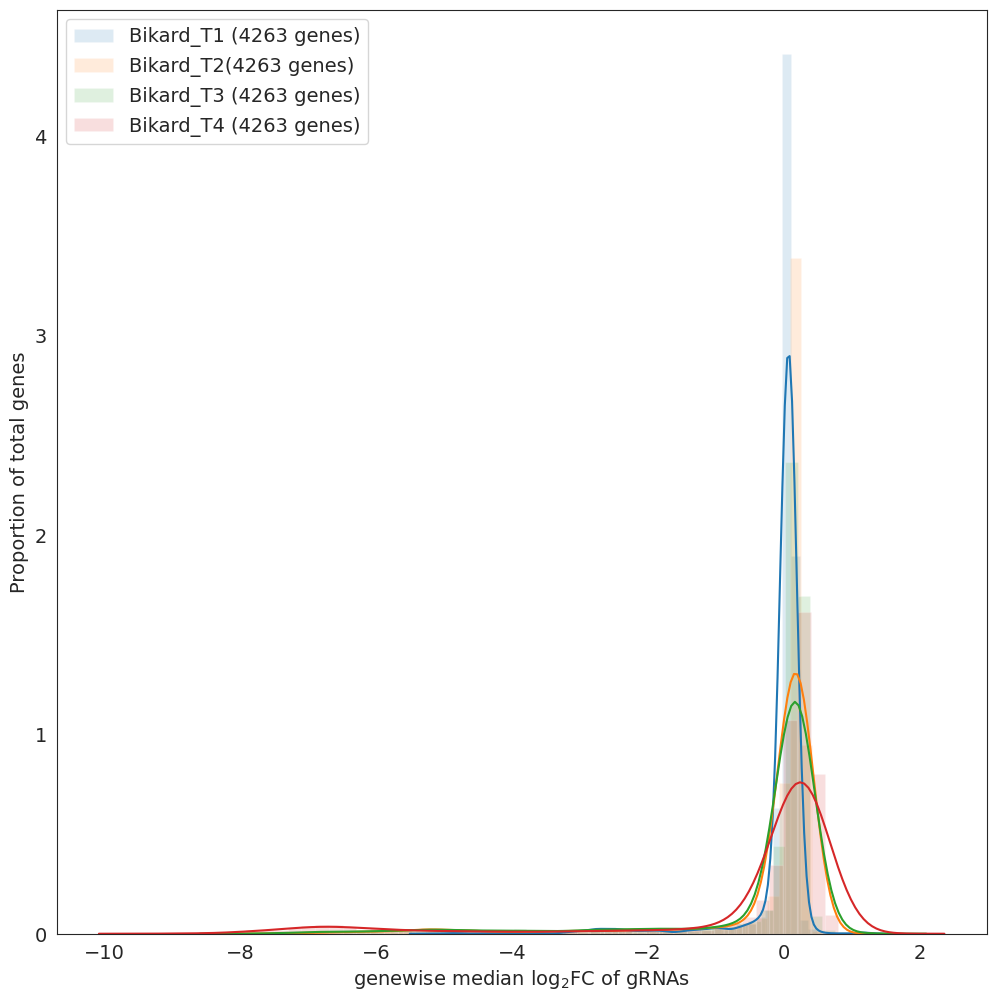

In [37]:
# median log2FC genewise in the bikard ontarget screens 
sns.set_style(style='white') 
fig, ax= plt.subplots(figsize=(12,12))

sns.distplot(bikard_ontarget_pergene_medianT1['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Bikard_T1 (%s genes)'%len(bikard_ontarget_pergene_medianT1))

sns.distplot(bikard_ontarget_pergene_medianT2['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Bikard_T2(%s genes)'%len(bikard_ontarget_pergene_medianT2))

sns.distplot(bikard_ontarget_pergene_medianT3['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Bikard_T3 (%s genes)'%len(bikard_ontarget_pergene_medianT3))

sns.distplot(bikard_ontarget_pergene_medianT4['median_log2FC'],
             kde=True,rug=False,kde_kws={"shade":False, "bw":0.2},hist_kws={"alpha": 0.15},
            label = 'Bikard_T4 (%s genes)'%len(bikard_ontarget_pergene_medianT4))


plt.legend(loc='upper left',fontsize=14)
plt.xlabel("genewise median log$_2$FC of gRNAs",fontsize=14)
plt.ylabel("Proportion of total genes",fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_medianlog2FCgenewise.pdf",dpi=400)
plt.show()

In [35]:
### Fetching genes which have median log2FC < -2.0 

#### Cui datasets
# growth screen 
# genes with median log2FC genewise < -2.0 in LC-E18 
g_cui_E18=list(set(cui_E18_pergene_median[(cui_E18_pergene_median['median_log2FC'] < -2.0)]['geneid']))
# genes with median log2FC genewise < -2.0 in LC-E75
g_cui_E75=list(set(cui_E75_pergene_median[(cui_E75_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# Rousset datasets
# growth screen
g_rousset_gr=list(set(rou_growth_pergene_median[(rou_growth_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# phage screens
## phage 186
g_rousset_ph186=list(set(rou_phage186_pergene_median[(rou_phage186_pergene_median['median_log2FC'] < -2.0)]['geneid']))

## phage lambda 
g_rousset_phlambda=list(set(rou_phagelambda_pergene_median[(rou_phagelambda_pergene_median['median_log2FC'] < -2.0)]['geneid']))

## phage T4 
g_rousset_phT4=list(set(rou_phageT4_pergene_median[(rou_phageT4_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# transduction screen 
g_rousset_tr=list(set(rou_transd_pergene_median[(rou_transd_pergene_median['median_log2FC'] < -2.0)]['geneid']))


#Wang datasets 
# growth screen 
g_wang_growth=list(set(wang_growth_pergene_median[(wang_growth_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# auxotrophy screen 
g_wang_aux=list(set(auxotrophy_pergene_median[(auxotrophy_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# furfural screen 
g_wang_fur=list(set(furfural_pergene_median[(furfural_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# amino acid screen 
g_wang_aa=list(set(amino_pergene_median[(amino_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# isobutanol screen 
g_wang_ib=list(set(isob_pergene_median[(isob_pergene_median['median_log2FC'] < -2.0)]['geneid']))

# bikard LCE75 screen T1
g_bikard_E75t1=list(set(bikard_ontarget_pergene_medianT1[(bikard_ontarget_pergene_medianT1['median_log2FC'] < -2.0)]['geneid']))

# bikard LCE75 screen T2 
g_bikard_E75t2=list(set(bikard_ontarget_pergene_medianT2[(bikard_ontarget_pergene_medianT2['median_log2FC'] < -2.0)]['geneid']))

# bikard LCE75 screen T3
g_bikard_E75t3=list(set(bikard_ontarget_pergene_medianT3[(bikard_ontarget_pergene_medianT3['median_log2FC'] < -2.0)]['geneid']))

# bikard LCE75 screen T4 
g_bikard_E75t4=list(set(bikard_ontarget_pergene_medianT4[(bikard_ontarget_pergene_medianT4['median_log2FC'] < -2.0)]['geneid']))



print("Number of genes with median log2FC < -2.0 in each screen:")
print("Cui LC-E18 screen:", len(g_cui_E18))
print("Cui LC-E75 screen:", len(g_cui_E75))
print("")
print("Rousset essentiality screen:", len(g_rousset_gr))
print("Rousset phage 186 screen:", len(g_rousset_ph186))
print("Rousset phage lambda screen:", len(g_rousset_phlambda))
print("Rousset phage T4 screen:", len(g_rousset_phT4))
print("Rousset transduction screen:", len(g_rousset_tr))
print("")
print("Wang essentiality screen:", len(g_wang_growth))
print("Wang furfural screen:", len(g_wang_fur))
print("Wang L-trp biosynthesis screen:", len(g_wang_aa))
print("Wang isobutanol screen:", len(g_wang_ib))
print("Wang auxotrophy screen:", len(g_wang_aux))
print("")
print("Bikard E75 screen T1: ", len(g_bikard_E75t1))
print("Bikard E75 screen T2: ", len(g_bikard_E75t2))
print("Bikard E75 screen T3: ", len(g_bikard_E75t3))
print("Bikard E75 screen T4: ", len(g_bikard_E75t4))


Number of genes with median log2FC < -2.0 in each screen:
Cui LC-E18 screen: 440
Cui LC-E75 screen: 235

Rousset essentiality screen: 166
Rousset phage 186 screen: 3
Rousset phage lambda screen: 0
Rousset phage T4 screen: 1
Rousset transduction screen: 416

Wang essentiality screen: 420
Wang furfural screen: 208
Wang L-trp biosynthesis screen: 46
Wang isobutanol screen: 10
Wang auxotrophy screen: 101

Bikard E75 screen T1:  110
Bikard E75 screen T2:  301
Bikard E75 screen T3:  356
Bikard E75 screen T4:  475


In [ ]:
wang_dir = "/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/"
os.mkdir (wang_dir + "00_Auxotrophy_screen/03_Filtering4model_V2")
os.mkdir (wang_dir + "00_Aminoacid_screen/03_Filtering4model_V2")
os.mkdir (wang_dir + "00_Essentiality_screen/03_Filtering4model_V2")
os.mkdir (wang_dir + "00_Furfural_screen/03_Filtering4model_V2")
os.mkdir (wang_dir + "00_Isobutanol_screen/03_Filtering4model_V2")


rousset_dir = "/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/"
os.mkdir (rousset_dir + "00_growth_LCE75_screen/03_Filtering4model_V2")
os.mkdir (rousset_dir + "00_phage_screen/03_Filtering4model_V2")
os.mkdir (rousset_dir + "00_transduction_screen/03_Filtering4model_V2")

cui_dir = "/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/"
os.mkdir (cui_dir + "03_Filtering4model_V2")



In [ ]:
bikard_dir = "/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/"
os.mkdir(bikard_dir + "03_Filtering4model_V2")

In [40]:
# load the feature engg results files 
# wang dataset
fe_aux= pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Auxotrophy_screen/02_Feature_engg_auxotrophy/gRNAs.csv", sep = "\t")
fe_aa = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Aminoacid_screen/02_Feature_engg_aminoacid/gRNAs.csv", sep = "\t")
fe_ib = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Isobutanol_screen/02_Feature_engg_isobutanol/gRNAs.csv", sep= "\t")
fe_ff = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Furfural_screen/02_Feature_engg_furfural/gRNAs.csv", sep = "\t")
fe_wang_gr = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Essentiality_screen/02_Feature_engg_essentiality/gRNAs.csv", sep = "\t")

# rousset dataset
fe_rgr = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_growth_LCE75_screen/02_Feature_engg_growth/gRNAs.csv", sep = "\t") 
fe_rph = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_phage_screen/02_Feature_engg_phage/gRNAs.csv", sep = "\t")
fe_rtr = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_transduction_screen/02_Feature_engg_transduction/gRNAs.csv", sep = "\t")

# cui dataset 

fe_cui = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/02_Feature_engg_essentiality/gRNAs.csv", sep = "\t")

# bikard E75 dataset
fe_bikard = pd.read_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/02_Feature_engg_growth/gRNAs.csv", sep = "\t")

In [42]:
# check for guides with multiple gene mappings in preprocessing results
# wang dataset 
mm_aux = aux_preprocess[aux_preprocess['guide'].duplicated()]

mm_aa =amino_preprocess[amino_preprocess['guide'].duplicated()] 

mm_ib = isob_preprocess[isob_preprocess['guide'].duplicated()]

mm_ff= furf_preprocess[furf_preprocess['guide'].duplicated()] 

mm_wang_gr = wang_growth_preprocess[wang_growth_preprocess['guide'].duplicated()]

# rousset dataset 
mm_rgr = rou_growth_preprocess[rou_growth_preprocess['guide'].duplicated()] 

mm_rtr = rou_tr_preprocess[rou_tr_preprocess['guide'].duplicated()]

mm_rph = rou_ph_preprocess[rou_ph_preprocess['guide'].duplicated()]

# cui dataset 

mm_cui = cui_preprocess[cui_preprocess['guide'].duplicated()]
mm_cui # number of guides with multiple mappings 

# bikard LC-E75 screen
mm_bikard =bikard_preprocess[bikard_preprocess['guide'].duplicated()]
# number of multiple mappings of guides in each screen 
print(len(mm_aux), len(mm_aa), len(mm_ib), len(mm_ff), len(mm_wang_gr), len(mm_rgr), len(mm_rtr), len(mm_rph), len(mm_cui), len(mm_bikard))


print(fe_cui['seq'].duplicated().value_counts()) # duplicate mappings in FE results in Cui screen

cui_preprocess['guide'].duplicated().value_counts() # duplicate mappings in preprocessing results of Cui screen

0 0 0 0 0 0 0 0 4996 0
seq
False    71518
True      4993
Name: count, dtype: int64


guide
False    71431
True      4996
Name: count, dtype: int64

In [43]:
len(aux_preprocess), len(amino_preprocess), len(isob_preprocess), len(furf_preprocess), len(wang_growth_preprocess), len(rou_growth_preprocess), len(rou_ph_preprocess), len(rou_tr_preprocess), len(cui_preprocess), len(bikard_preprocess)

(47739, 47739, 47739, 47739, 53506, 53973, 17152, 17152, 76427, 20787)

In [44]:
len(fe_aux), len(fe_aa), len(fe_ib), len(fe_ff), len(fe_wang_gr), len(fe_rgr), len(fe_rph), len(fe_rtr), len(fe_cui), len(fe_bikard)

(47751, 47751, 47751, 47751, 53534, 54031, 17174, 17174, 76511, 20777)

In [45]:
fe1= fe_aux[fe_aux['seq'].isin(aux_preprocess['guide'])]
fe1=fe1.reset_index(drop=True)
pr1= aux_preprocess[aux_preprocess['guide'].isin(fe1['seq'])]
pr1=pr1.reset_index(drop=True)


In [46]:
len(fe1), len(pr1)

(47736, 47736)

In [47]:
checklist=list()
for i in range(len(fe1)):
    if str(fe1['seq'][i]) != str(pr1['guide'][i]):
        checklist.append(fe1['seq'][i])
print(checklist)    

[]


In [ ]:
### create merged files with preprocessed data and feature engg files 

# wang datasets
#fe_list = [fe_aux, fe_aa, fe_ib, fe_ff, fe_wang_gr]
#preprocess_list = [aux_preprocess, amino_preprocess, isob_preprocess, furf_preprocess, wang_growth_preprocess]



#newcols = ['seq', 'sgRNA fitness','guide_strand', 'PAM', 'sequence_30nt',
#       'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
#       'intergenic'] # seq is for the guide sequence common in both the preprocess and feature engg files


#for i in range(len(fe_list)): # feature engg files 
#    fe_list[i] = fe_list[i][fe_list[i]['seq'].isin(preprocess_list[i]['guide'])] # slice the FE results
#    preprocess_list[i] = preprocess_list[i][preprocess_list[i]['guide'].isin(fe_list[i]['seq'])] # slice the preprocess results
#    preprocess_list[i] = preprocess_list[i].rename(columns= {'guide': 'seq'})
#    fe_list[i]= fe_list[i].reset_index()
#    fe_list[i]=fe_list[i].drop(['index'], axis = 1)
#    preprocess_list[i]=preprocess_list[i].reset_index()
#    preprocess_list[i]=preprocess_list[i].drop(['index'], axis= 1)
#    fe_list[i] = pd.merge(fe_list[i], preprocess_list[i][newcols], on = 'seq')
#    fe_list[i] = fe_list[i].rename(columns = {'sgRNA fitness': 'log2FC'})

#fe_preproc_aux = fe_list[0]
#fe_preproc_aa = fe_list[1]
#fe_preproc_ib = fe_list[2]
#fe_preproc_ff = fe_list[3]
#fe_preproc_wang_gr = fe_list[4] 
####


#print("Wang: auxotrophy, L-trp biosynthesis, isobutanol, furfural, growth")
#print("FE:", len(fe_aux), len(fe_aa), len(fe_ib), len(fe_ff), len(fe_wang_gr))
#print("FE_preproc:",len(fe_preproc_aux), len(fe_preproc_aa), len(fe_preproc_ib), 
 #     len(fe_preproc_ff), len(fe_preproc_wang_gr))

#del preprocess_list[0:6]
#del fe_list[0:6]


# rousset datasets and bikard ontarget LC-E75 screen
##1. growth and transduction screen
#fe_list = [fe_ress, fe_rtr, fe_bikard]
#preprocess_list = [rou_ess_preprocess, rou_tr_preprocess, bikard_preprocess]
#newcols = ['seq', 'log2FC','guide_strand', 'PAM', 'sequence_30nt',
 #      'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
  #     'intergenic'] # seq is for the guide sequence common in both the preprocess and feature engg files

#print(len(rou_ess_preprocess))

#for i in range(len(fe_list)):
  #   fe_list[i] = fe_list[i][fe_list[i]['seq'].isin(preprocess_list[i]['guide'])] # slice the FE results
  #   preprocess_list[i] = preprocess_list[i][preprocess_list[i]['guide'].isin(fe_list[i]['seq'])] # slice the preprocess results
  #  preprocess_list[i] = preprocess_list[i].rename(columns= {'guide': 'seq'})
  #  fe_list[i]= fe_list[i].reset_index()
  #  fe_list[i]=fe_list[i].drop(['index'], axis = 1)
  #  preprocess_list[i]=preprocess_list[i].reset_index() 
  #  preprocess_list[i]=preprocess_list[i].drop(['index'], axis= 1)
  #  fe_list[i] = pd.merge(fe_list[i], preprocess_list[i][newcols], on = 'seq')

#fe_preproc_ress = fe_list[0]
#fe_preproc_rtr = fe_list[1]

#print("")
#print("Rousset: essentiality, transduction")
#print("FE:", len(fe_ress), len(fe_rtr))
#print("FE_Preproc:",len(fe_preproc_ress), len(fe_preproc_rtr))



#del preprocess_list[0:2]
#del fe_list[0:2]

##2. phages screens
#newcols = ['seq', 'log2FC_lambda','log2FC_T4', 'log2FC_186' ,'guide_strand', 'PAM', 'sequence_30nt',
 #      'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
 #      'intergenic'] 


#fe_preproc_ph = fe_rph[fe_rph['seq'].isin(rou_ph_preprocess['guide'])] 
#rou_ph_preproc = rou_ph_preprocess[rou_ph_preprocess['guide'].isin(fe_preproc_ph['seq'])]
#rou_ph_preproc = rou_ph_preproc.rename(columns = {'guide': 'seq'})
#fe_preproc_ph= fe_preproc_ph.reset_index()
#fe_preproc_ph=fe_preproc_ph.drop(['index'], axis = 1)
#rou_ph_preproc = rou_ph_preproc.reset_index()
#rou_ph_preproc =rou_ph_preproc.drop(['index'], axis = 1)
#fe_preproc_ph = pd.merge(fe_preproc_ph, rou_ph_preproc[newcols], on = 'seq')


#print("")
#print("Rousset phage screen")
#print("FE:",len (fe_rph))
#print("FE_Preproc:", len(fe_preproc_ph))
      
#del rou_ph_preproc



In [48]:
len(cui_preprocess), len(fe_cui)

(76427, 76511)

In [49]:
cui_preprocess=cui_preprocess.rename(columns= {'seq':'sequence'})

In [50]:
cui_preprocess=cui_preprocess.drop(['sequence'], axis=1)

In [51]:
len(fe_cui), len(cui_preprocess)

(76511, 76427)

In [52]:
# feature engg datasets
# wang dataset
fe_list = [fe_aux, fe_aa, fe_ib, fe_ff, fe_wang_gr]
preprocess_list = [aux_preprocess, amino_preprocess, isob_preprocess, furf_preprocess, wang_growth_preprocess]
                  
# seq colname is for the guide sequence common in both the preprocess and feature engg files

                     
#newcols = ['seq', 'sgRNA fitness','guide_strand', 'PAM', 'sequence_30nt',
#       'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
#       'intergenic', 'gene_biotype', 'geneid_trproduct'] # seq is for the guide sequence common in both the preprocess and feature engg files


for i in range(len(fe_list)): # feature engg files 
    fe_list[i] = fe_list[i][fe_list[i]['seq'].isin(preprocess_list[i]['guide'])] # slice the FE results
    preprocess_list[i] = preprocess_list[i][preprocess_list[i]['guide'].isin(fe_list[i]['seq'])] # slice the preprocess results
    preprocess_list[i] = preprocess_list[i].rename(columns= {'guide': 'seq'})
    fe_list[i]= fe_list[i].reset_index(drop=True)
    preprocess_list[i]=preprocess_list[i].reset_index(drop=True)
    for j in range(len(fe_list[i])):
        if str(preprocess_list[i]['seq'][j]) == str(fe_list[i]['seq'][j]):
            fe_list[i].at[j, 'log2FC']= preprocess_list[i]['sgRNA fitness'][j]
            fe_list[i].at[j, 'guide_strand']=preprocess_list[i]['guide_strand'][j]
            fe_list[i].at[j, 'PAM']=preprocess_list[i]['PAM'][j]
            fe_list[i].at[j, 'sequence_30nt']=preprocess_list[i]['sequence_30nt'][j]
            fe_list[i].at[j, 'distance_start_codon']=preprocess_list[i]['distance_start_codon'][j]
            fe_list[i].at[j, 'distance_start_codon_perc']=preprocess_list[i]['distance_start_codon_perc'][j]
            fe_list[i].at[j, 'coding_strand']=preprocess_list[i]['coding_strand'][j]
            fe_list[i].at[j, 'intergenic']=preprocess_list[i]['intergenic'][j]
            fe_list[i].at[j, 'gene_biotype']=preprocess_list[i]['gene_biotype'][j]
            fe_list[i].at[j, 'geneid_trproduct']=preprocess_list[i]['geneid_trproduct'][j]

fe_preproc_aux = fe_list[0]
fe_preproc_aa = fe_list[1]
fe_preproc_ib = fe_list[2]
fe_preproc_ff = fe_list[3]
fe_preproc_wang_gr = fe_list[4] 

print("Wang: auxotrophy, amino acid, isobutanol, furfural, growth")
print("FE:", len(fe_aux), len(fe_aa), len(fe_ib), len(fe_ff), len(fe_wang_gr))
print("FE_preproc:",len(fe_preproc_aux), len(fe_preproc_aa), len(fe_preproc_ib), 
      len(fe_preproc_ff), len(fe_preproc_wang_gr))

del preprocess_list[0:5]
del fe_list[0:5]


Wang: auxotrophy, amino acid, isobutanol, furfural, growth
FE: 47751 47751 47751 47751 53534
FE_preproc: 47736 47736 47736 47736 53503


In [53]:
len(aux_preprocess), len(amino_preprocess), len(isob_preprocess), len(furf_preprocess), len(wang_growth_preprocess)

(47739, 47739, 47739, 47739, 53506)

In [54]:
len(fe_wang_gr)

53534

In [55]:
#find the different guides between the FE_preprocessing merged file and the preprocessing file of wang growth screen
seq_fe_wang_gr= fe_wang_gr.seq
filt_fe_wang=wang_growth_preprocess[~(wang_growth_preprocess.guide.isin(seq_fe_wang_gr))]
filt_fe_wang

,sgRNA,gene,sgRNA fitness,Z score,Quality,guide,geneid,genename,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,gene_biotype,geneid_trproduct
17893,sdsRb4433_52,sdsR,0.066313,0.078100,Good,TAAGAATAGATGACGACGCC,b4432,ryeA,-1.0,AGG,CCGTGTAAATCTTCCAGCACCGTCAGGTTG,581.0,233.333333,1.0,0.0,ncRNA,0
43840,sdsRb4433_12,sdsR,0.307630,0.362315,Good,AAAATGGTCAATAAAAAGCG,b4432,ryeA,-1.0,GGG,TCCTTGCTGGCAGCGATAATGCTCGGGTTA,86.0,34.538153,1.0,0.0,ncRNA,0
50171,sdsRb4433_9,sdsR,-0.299798,-0.353091,Good,ATGGTCAATAAAAAGCGTGG,b4432,ryeA,-1.0,TGG,TGTTAAGAATATTAGCCCCGATAATGGAAC,172.0,69.076305,1.0,0.0,ncRNA,0


In [56]:
fe_preproc_aux[fe_preproc_aux['gene_length'] < fe_preproc_aux['distance_start_codon']]

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,homopolymers,log2FC,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct


In [57]:
fe_preproc_wang_gr[fe_preproc_wang_gr['geneid']== 'b4432']

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,homopolymers,log2FC,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct
1176,CATTTCCCTGGACCGAATAC,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,3.0,-0.129302,-1.0,AGG,GAGCCATTTCCCTGGACCGAATACAGGAAT,62.0,24.899598,1.0,0.0,0
8855,TAATGCCAACTTTTAGCGCA,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,4.0,0.314095,-1.0,CGG,GCATTAATGCCAACTTTTAGCGCACGGCTC,100.0,40.160643,1.0,0.0,0
14571,CCGAATACAGGAATCGTGTT,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,2.0,0.399910,-1.0,CGG,TGGACCGAATACAGGAATCGTGTTCGGTCT,50.0,20.080321,1.0,0.0,0
20393,TCTCCCAAGAGCCATTTCCC,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,3.0,0.013964,-1.0,TGG,GCTCTCTCCCAAGAGCCATTTCCCTGGACC,74.0,29.718876,1.0,0.0,0
23163,TGACCATTTTGCACGCAAAC,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,4.0,-1.293479,-1.0,TGG,TTATTGACCATTTTGCACGCAAACTGGAAA,175.0,70.281124,1.0,0.0,0
23598,GCGTCGTCATCTATTCTTAA,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,2.0,-0.142071,-1.0,AGG,CCTGGCGTCGTCATCTATTCTTAAAGGGCA,144.0,57.831325,1.0,0.0,0
23602,CGTCGTCATCTATTCTTAAA,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,3.0,0.035708,-1.0,GGG,CTGGCGTCGTCATCTATTCTTAAAGGGCAA,143.0,57.429719,1.0,0.0,0
51417,TCATCTATTCTTAAAGGGCA,b4432,ryeA,ncRNA,0.0,249.0,45.78,1.0,0.0,0.0,...,3.0,-0.374298,-1.0,AGG,GTCGTCATCTATTCTTAAAGGGCAAGGCAA,138.0,55.421687,1.0,0.0,0


In [58]:
# rousset screens: growth , transduction
#newcols = ['seq', 'log2FC','guide_strand', 'PAM', 'sequence_30nt',
 #      'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
  #     'intergenic',  'gene_biotype', 'geneid_trproduct'] # seq is for the guide sequence common in both the preprocess and feature engg files
fe_list=[fe_rgr, fe_rtr]
preprocess_list=[rou_growth_preprocess, rou_tr_preprocess]


for i in range(len(fe_list)): # feature engg files 
    fe_list[i] = fe_list[i][fe_list[i]['seq'].isin(preprocess_list[i]['guide'])] # slice the FE results
    preprocess_list[i] = preprocess_list[i][preprocess_list[i]['guide'].isin(fe_list[i]['seq'])] # slice the preprocess results
    preprocess_list[i] = preprocess_list[i].rename(columns= {'guide': 'seq'})
    fe_list[i]= fe_list[i].reset_index(drop=True)
    preprocess_list[i]=preprocess_list[i].reset_index(drop=True)
    for j in range(len(fe_list[i])):
        if str(preprocess_list[i]['seq'][j]) == str(fe_list[i]['seq'][j]):
            fe_list[i].at[j, 'log2FC']= preprocess_list[i]['log2FC'][j]
            fe_list[i].at[j, 'guide_strand']=preprocess_list[i]['guide_strand'][j]
            fe_list[i].at[j, 'PAM']=preprocess_list[i]['PAM'][j]
            fe_list[i].at[j, 'sequence_30nt']=preprocess_list[i]['sequence_30nt'][j]
            fe_list[i].at[j, 'distance_start_codon']=preprocess_list[i]['distance_start_codon'][j]
            fe_list[i].at[j, 'distance_start_codon_perc']=preprocess_list[i]['distance_start_codon_perc'][j]
            fe_list[i].at[j, 'coding_strand']=preprocess_list[i]['coding_strand'][j]
            fe_list[i].at[j, 'intergenic']=preprocess_list[i]['intergenic'][j]
            fe_list[i].at[j, 'gene_biotype']=preprocess_list[i]['gene_biotype'][j]
            fe_list[i].at[j, 'geneid_trproduct']=preprocess_list[i]['geneid_trproduct'][j]

fe_preproc_rgr = fe_list[0]
fe_preproc_rtr = fe_list[1]

del fe_list[0:2]
del preprocess_list[0:2]


print("")
print("Rousset: growth, transduction")
print("FE:", len(fe_rgr), len(fe_rtr))
print("FE_Preproc:",len(fe_preproc_rgr), len(fe_preproc_rtr))


Rousset: growth, transduction
FE: 54031 17174
FE_Preproc: 53964 17149


In [59]:
##2. phages screens
#newcols = ['seq', 'log2FC_lambda','log2FC_T4', 'log2FC_186' ,'guide_strand', 'PAM', 'sequence_30nt',
 #      'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
 #      'intergenic',  'gene_biotype', 'geneid_trproduct']

fe_rph=fe_rph[fe_rph['seq'].isin(rou_ph_preprocess['guide'])]
rou_ph_preprocess=rou_ph_preprocess[rou_ph_preprocess['guide'].isin(fe_rph['seq'])]
fe_rph=fe_rph.reset_index(drop=True)
rou_ph_preprocess=rou_ph_preprocess.reset_index(drop=True)
rou_ph_preprocess = rou_ph_preprocess.rename(columns= {'guide': 'seq'})

fe_preproc_ph=fe_rph.copy()

for i in range(len(fe_rph)):
    if str(rou_ph_preprocess['seq'][i]) == str(fe_rph['seq'][i]):
        fe_preproc_ph.at[i, 'log2FC_lambda']= rou_ph_preprocess['log2FC_lambda'][i]
        fe_preproc_ph.at[i, 'log2FC_T4']= rou_ph_preprocess['log2FC_T4'][i]
        fe_preproc_ph.at[i, 'log2FC_186']= rou_ph_preprocess['log2FC_186'][i]
        fe_preproc_ph.at[i, 'guide_strand']=rou_ph_preprocess['guide_strand'][i]
        fe_preproc_ph.at[i, 'PAM']=rou_ph_preprocess['PAM'][i]
        fe_preproc_ph.at[i, 'sequence_30nt']=rou_ph_preprocess['sequence_30nt'][i]
        fe_preproc_ph.at[i, 'distance_start_codon']=rou_ph_preprocess['distance_start_codon'][i]
        fe_preproc_ph.at[i, 'distance_start_codon_perc']=rou_ph_preprocess['distance_start_codon_perc'][i]
        fe_preproc_ph.at[i, 'coding_strand']=rou_ph_preprocess['coding_strand'][i]
        fe_preproc_ph.at[i, 'intergenic']=rou_ph_preprocess['intergenic'][i]
        fe_preproc_ph.at[i, 'gene_biotype']=rou_ph_preprocess['gene_biotype'][i]
        fe_preproc_ph.at[i, 'geneid_trproduct']=rou_ph_preprocess['geneid_trproduct'][i]


print("")
print("Rousset phage screen")
print("FE:",len (fe_rph))
print("FE_Preproc:", len(fe_preproc_ph))



Rousset phage screen
FE: 17149
FE_Preproc: 17149


In [60]:
# Bikard on target screen

# newcols =['seq', T1', guide_strand', 'PAM', 'sequence_30nt',
       #'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
       #'intergenic',  'gene_biotype', 'geneid_trproduct']
        
fe_bikard=fe_bikard[fe_bikard['seq'].isin(bikard_preprocess['guide'])]
bikard_preprocess=bikard_preprocess[bikard_preprocess['guide'].isin(fe_bikard['seq'])]
fe_bikard=fe_bikard.reset_index(drop=True)
bikard_preprocess=bikard_preprocess.reset_index(drop=True)
bikard_preprocess = bikard_preprocess.rename(columns= {'guide': 'seq'})

fe_preproc_bikardT1=fe_bikard.copy()

for i in range(len(fe_bikard)):
    if str(bikard_preprocess['seq'][i]) == str(fe_bikard['seq'][i]):
        fe_preproc_bikardT1.at[i, 'log2FC']= bikard_preprocess['T1'][i] # time point T1
        fe_preproc_bikardT1.at[i, 'guide_strand']=bikard_preprocess['guide_strand'][i]
        fe_preproc_bikardT1.at[i, 'PAM']=bikard_preprocess['PAM'][i]
        fe_preproc_bikardT1.at[i, 'sequence_30nt']=bikard_preprocess['sequence_30nt'][i]
        fe_preproc_bikardT1.at[i, 'distance_start_codon']=bikard_preprocess['distance_start_codon'][i]
        fe_preproc_bikardT1.at[i, 'distance_start_codon_perc']=bikard_preprocess['distance_start_codon_perc'][i]
        fe_preproc_bikardT1.at[i, 'coding_strand']=bikard_preprocess['coding_strand'][i]
        fe_preproc_bikardT1.at[i, 'intergenic']=bikard_preprocess['intergenic'][i]
        fe_preproc_bikardT1.at[i, 'gene_biotype']=bikard_preprocess['gene_biotype'][i]
        fe_preproc_bikardT1.at[i, 'geneid_trproduct']=bikard_preprocess['geneid_trproduct'][i]

print("Bikard:")
print("FE:", len(fe_bikard))
print("FE_Preproc:", len(fe_preproc_bikardT1))

Bikard:
FE: 20767
FE_Preproc: 20767


In [61]:
# Bikard on target screen

# newcols =['seq', T2', guide_strand', 'PAM', 'sequence_30nt',
       #'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
       #'intergenic',  'gene_biotype', 'geneid_trproduct']
        
#fe_bikard=fe_bikard[fe_bikard['seq'].isin(bikard_preprocess['guide'])]
#bikard_preprocess=bikard_preprocess[bikard_preprocess['guide'].isin(fe_bikard['seq'])]
#fe_bikard=fe_bikard.reset_index(drop=True)
#bikard_preprocess=bikard_preprocess.reset_index(drop=True)
#bikard_preprocess = bikard_preprocess.rename(columns= {'guide': 'seq'})

fe_preproc_bikardT2=fe_bikard.copy()

for i in range(len(fe_bikard)):
    if str(bikard_preprocess['seq'][i]) == str(fe_bikard['seq'][i]):
        fe_preproc_bikardT2.at[i, 'log2FC']= bikard_preprocess['T2'][i] # time point T2
        fe_preproc_bikardT2.at[i, 'guide_strand']=bikard_preprocess['guide_strand'][i]
        fe_preproc_bikardT2.at[i, 'PAM']=bikard_preprocess['PAM'][i]
        fe_preproc_bikardT2.at[i, 'sequence_30nt']=bikard_preprocess['sequence_30nt'][i]
        fe_preproc_bikardT2.at[i, 'distance_start_codon']=bikard_preprocess['distance_start_codon'][i]
        fe_preproc_bikardT2.at[i, 'distance_start_codon_perc']=bikard_preprocess['distance_start_codon_perc'][i]
        fe_preproc_bikardT2.at[i, 'coding_strand']=bikard_preprocess['coding_strand'][i]
        fe_preproc_bikardT2.at[i, 'intergenic']=bikard_preprocess['intergenic'][i]
        fe_preproc_bikardT2.at[i, 'gene_biotype']=bikard_preprocess['gene_biotype'][i]
        fe_preproc_bikardT2.at[i, 'geneid_trproduct']=bikard_preprocess['geneid_trproduct'][i]

print("Bikard:")
print("FE:", len(fe_bikard))
print("FE_Preproc:", len(fe_preproc_bikardT2))

Bikard:
FE: 20767
FE_Preproc: 20767


In [62]:
# Bikard on target screen

# newcols =['seq', T3', guide_strand', 'PAM', 'sequence_30nt',
       #'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
       #'intergenic',  'gene_biotype', 'geneid_trproduct']
        
#fe_bikard=fe_bikard[fe_bikard['seq'].isin(bikard_preprocess['guide'])]
#bikard_preprocess=bikard_preprocess[bikard_preprocess['guide'].isin(fe_bikard['seq'])]
#fe_bikard=fe_bikard.reset_index(drop=True)
#bikard_preprocess=bikard_preprocess.reset_index(drop=True)
#bikard_preprocess = bikard_preprocess.rename(columns= {'guide': 'seq'})

fe_preproc_bikardT3=fe_bikard.copy()

for i in range(len(fe_bikard)):
    if str(bikard_preprocess['seq'][i]) == str(fe_bikard['seq'][i]):
        fe_preproc_bikardT3.at[i, 'log2FC']= bikard_preprocess['T3'][i] # time point T3
        fe_preproc_bikardT3.at[i, 'guide_strand']=bikard_preprocess['guide_strand'][i]
        fe_preproc_bikardT3.at[i, 'PAM']=bikard_preprocess['PAM'][i]
        fe_preproc_bikardT3.at[i, 'sequence_30nt']=bikard_preprocess['sequence_30nt'][i]
        fe_preproc_bikardT3.at[i, 'distance_start_codon']=bikard_preprocess['distance_start_codon'][i]
        fe_preproc_bikardT3.at[i, 'distance_start_codon_perc']=bikard_preprocess['distance_start_codon_perc'][i]
        fe_preproc_bikardT3.at[i, 'coding_strand']=bikard_preprocess['coding_strand'][i]
        fe_preproc_bikardT3.at[i, 'intergenic']=bikard_preprocess['intergenic'][i]
        fe_preproc_bikardT3.at[i, 'gene_biotype']=bikard_preprocess['gene_biotype'][i]
        fe_preproc_bikardT3.at[i, 'geneid_trproduct']=bikard_preprocess['geneid_trproduct'][i]

print("Bikard:")
print("FE:", len(fe_bikard))
print("FE_Preproc:", len(fe_preproc_bikardT3))

Bikard:
FE: 20767
FE_Preproc: 20767


In [63]:
# Bikard on target screen

# newcols =['seq', T4', guide_strand', 'PAM', 'sequence_30nt',
       #'distance_start_codon', 'distance_start_codon_perc', 'coding_strand',
       #'intergenic',  'gene_biotype', 'geneid_trproduct']
        
#fe_bikard=fe_bikard[fe_bikard['seq'].isin(bikard_preprocess['guide'])]
#bikard_preprocess=bikard_preprocess[bikard_preprocess['guide'].isin(fe_bikard['seq'])]
#fe_bikard=fe_bikard.reset_index(drop=True)
#bikard_preprocess=bikard_preprocess.reset_index(drop=True)
#bikard_preprocess = bikard_preprocess.rename(columns= {'guide': 'seq'})

fe_preproc_bikardT4=fe_bikard.copy()

for i in range(len(fe_bikard)):
    if str(bikard_preprocess['seq'][i]) == str(fe_bikard['seq'][i]):
        fe_preproc_bikardT4.at[i, 'log2FC']= bikard_preprocess['T4'][i] # time point T4
        fe_preproc_bikardT4.at[i, 'guide_strand']=bikard_preprocess['guide_strand'][i]
        fe_preproc_bikardT4.at[i, 'PAM']=bikard_preprocess['PAM'][i]
        fe_preproc_bikardT4.at[i, 'sequence_30nt']=bikard_preprocess['sequence_30nt'][i]
        fe_preproc_bikardT4.at[i, 'distance_start_codon']=bikard_preprocess['distance_start_codon'][i]
        fe_preproc_bikardT4.at[i, 'distance_start_codon_perc']=bikard_preprocess['distance_start_codon_perc'][i]
        fe_preproc_bikardT4.at[i, 'coding_strand']=bikard_preprocess['coding_strand'][i]
        fe_preproc_bikardT4.at[i, 'intergenic']=bikard_preprocess['intergenic'][i]
        fe_preproc_bikardT4.at[i, 'gene_biotype']=bikard_preprocess['gene_biotype'][i]
        fe_preproc_bikardT4.at[i, 'geneid_trproduct']=bikard_preprocess['geneid_trproduct'][i]

print("Bikard:")
print("FE:", len(fe_bikard))
print("FE_Preproc:", len(fe_preproc_bikardT4))

Bikard:
FE: 20767
FE_Preproc: 20767


In [64]:
len(fe_bikard), len(bikard_preprocess)

(20767, 20767)

In [65]:
# cui dataset 
#newcols=['gene','fit18', 'fit75', 'guide_strand', 'PAM',
#       'sequence_30nt', 'distance_start_codon', 'distance_start_codon_perc',
#       'coding_strand', 'intergenic',  'gene_biotype', 'geneid_trproduct']
    
### create merged files with preprocessed data and feature engg files 
fe_preproc_cui=fe_cui[fe_cui['seq'].isin(cui_preprocess['guide'])].reset_index(drop=True)
cui_preprocess2=cui_preprocess[cui_preprocess['guide'].isin(fe_preproc_cui['seq'])]
fe_cui=fe_cui.reset_index(drop=True)
cui_preprocess2=cui_preprocess2.reset_index(drop=True)
cui_preprocess2 = cui_preprocess2.rename(columns = {'guide': 'seq'})

for i in range(len(cui_preprocess2)):
    if str(cui_preprocess2['seq'][i]) == str(fe_preproc_cui['seq'][i]):
        fe_preproc_cui.at[i, 'fit18']= cui_preprocess2['fit18'][i]
        fe_preproc_cui.at[i, 'fit75']= cui_preprocess2['fit75'][i]
        fe_preproc_cui.at[i, 'guide_strand']=cui_preprocess2['guide_strand'][i]
        fe_preproc_cui.at[i, 'PAM']=cui_preprocess2['PAM'][i]
        fe_preproc_cui.at[i, 'sequence_30nt']=cui_preprocess2['sequence_30nt'][i]
        fe_preproc_cui.at[i, 'distance_start_codon']=cui_preprocess2['distance_start_codon'][i]
        fe_preproc_cui.at[i, 'distance_start_codon_perc']=cui_preprocess2['distance_start_codon_perc'][i]
        fe_preproc_cui.at[i, 'coding_strand']=cui_preprocess2['coding_strand'][i]
        fe_preproc_cui.at[i, 'intergenic']=cui_preprocess2['intergenic'][i]    
        fe_preproc_cui.at[i, 'gene_biotype']=cui_preprocess2['gene_biotype'][i]
        fe_preproc_cui.at[i, 'geneid_trproduct']=cui_preprocess2['geneid_trproduct'][i]

In [66]:
len(fe_cui), len(cui_preprocess), len(fe_preproc_cui)

(76511, 76427, 76411)

In [67]:
len(fe_preproc_cui), len(fe_cui), len(cui_preprocess2), len(cui_preprocess)

(76411, 76511, 76411, 76427)

In [68]:
# number of guides targeting multiple genes in these screens
print(len(fe_preproc_rgr[fe_preproc_rgr['seq'].duplicated()])) # rousset growth screen
print(len(fe_preproc_ph[fe_preproc_ph['seq'].duplicated()])) # phage screen
print(len(fe_preproc_rtr[fe_preproc_rtr['seq'].duplicated()])) # transduction screen

print(len(fe_preproc_aa[fe_preproc_aa['seq'].duplicated()])) # l-trp biosynthesis screen
print(len(fe_preproc_aux[fe_preproc_aux['seq'].duplicated()])) # auxotrophy screen
print(len(fe_preproc_ff[fe_preproc_ff['seq'].duplicated()])) # furfural screen
print(len(fe_preproc_ib[fe_preproc_ib['seq'].duplicated()])) # isobutanol screen
print(len(fe_preproc_wang_gr[fe_preproc_wang_gr['seq'].duplicated()])) # wang growth screen


print(len(fe_preproc_cui[fe_preproc_cui['seq'].duplicated()])) # cui screen

print(len(fe_preproc_bikardT1[fe_preproc_bikardT1['seq'].duplicated()])) # bikard screen T1
print(len(fe_preproc_bikardT1[fe_preproc_bikardT2['seq'].duplicated()])) # bikard screen T2
print(len(fe_preproc_bikardT1[fe_preproc_bikardT3['seq'].duplicated()])) # bikard screen T3
print(len(fe_preproc_bikardT1[fe_preproc_bikardT4['seq'].duplicated()])) # bikard screen T4

0
0
0
0
0
0
0
0
4993
0
0
0
0


In [69]:
fe_preproc_cui[fe_preproc_cui['seq'].duplicated() & fe_preproc_cui['geneid'].str.contains("ins")] # check for ins genes

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,fit18,fit75,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct


In [66]:
### keep one of the duplicated guides along with unique guides in cuiE18 dataset with max  negative log2FC: DOES NOT WORK OPTIMALLY
unique_df=fe_preproc_cui[fe_preproc_cui.seq.duplicated()== False] # df with unique set of guides 
duplicated_df=fe_preproc_cui[fe_preproc_cui.seq.duplicated()== True]

duplicated_cui_gseqs=list(set(duplicated_df.seq)) # set of guide sequences in Cui18 dataset which are duplicated 
fe_preproc_cui3=pd.DataFrame()

for i in duplicated_cui_gseqs:
    guideseq_df=duplicated_df[duplicated_df['seq']== i]
    guideseq_df=pd.DataFrame(guideseq_df.sort_values(by='fit18').iloc[0]).transpose() # keep the guides with max negative log2FC which target multiple genes
    fe_preproc_cui3=pd.concat([fe_preproc_cui3, guideseq_df], axis =0, ignore_index= True)

# combine the unique guides df and df with one of the guides from the duplicated df of guides
fe_preproc_cui3=pd.concat([fe_preproc_cui3, unique_df], axis =0, ignore_index= True).reset_index(drop=True)

In [67]:
# remove the duplicate from the Cui LCE18 dataset
print(len(list(set(fe_preproc_cui['seq'])))) # cui screen

#  script for filtering guides with differing log2FC in cui dataset 

# dataframe with unique guides in multiple datasets 
unique_df=fe_preproc_cui[fe_preproc_cui.seq.duplicated()== False]

# duplicated guides in multiple datasets 
duplicate_seqs=fe_preproc_cui[(fe_preproc_cui.seq.duplicated()== True)]
duplicate_seqs=list(set(duplicate_seqs['seq']))
print(len(duplicate_seqs))

# retain only one guide with minimum log2FC for a given gene among all datasets
duplicateguide_filtered=pd.DataFrame()
duplicateguide_multiplegenes_filtered=pd.DataFrame()
for i in range(len(duplicate_seqs)):
    duplicatedseqs_in_df=fe_preproc_cui[fe_preproc_cui['seq']==duplicate_seqs[i]]
    # duplicate guides in the dataset target only a single gene 
    if len(duplicatedseqs_in_df['geneid'].unique())== 1: 
         # keep the guide + gene features of the guide with minimum log2FC 
        unduplicated_df=pd.DataFrame(duplicatedseqs_in_df.sort_values(by=['fit18'], ascending= True).iloc[0]).transpose() 
        duplicateguide_filtered=pd.concat([duplicateguide_filtered, unduplicated_df], axis =0)
    # duplicate guides in the dataset which target more than one gene 
    elif len(duplicatedseqs_in_df['geneid'].unique()) >1:
        
        duplicatedseqs_in_df.sort_values(by=['geneid'])
        # fetch set of genes targeted by that guide in all the datasets
        multipletarget_geneset=list(set(duplicatedseqs_in_df.geneid))
            
        # retain the guides from the dataset with minimum log2FC for that target gene 
        for gene in multipletarget_geneset:
            unduplicated_multiplegenedf=pd.DataFrame(duplicatedseqs_in_df[(duplicatedseqs_in_df['geneid']==gene)].sort_values(by=['geneid', 'fit18'], ascending= True).iloc[0]).transpose()
            duplicateguide_multiplegenes_filtered=pd.concat([duplicateguide_multiplegenes_filtered, unduplicated_multiplegenedf], axis=0)

# no multiple genes target guides                 
#fe_preproc_cui_dupguidesfiltCE18=pd.concat([duplicateguide_filtered, unique_df], axis =0, ignore_index=True) 

fe_preproc_cui_dupguidesfiltCE18=unique_df.reset_index(drop=True) 
print("final cui LCE75 guides nr:",len(fe_preproc_cui_dupguidesfiltCE18))
print(len(duplicateguide_filtered), len(unique_df), len(duplicateguide_multiplegenes_filtered))

71418
1251
final cui LCE75 guides nr: 71418
15 71418 6206


In [68]:
fe_preproc_cui_dupguidesfiltCE18.seq.duplicated().value_counts()

seq
False    71418
Name: count, dtype: int64

In [69]:
fe_preproc_cui[fe_preproc_cui.seq.isin(duplicateguide_filtered['seq'])]

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,fit18,fit75,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct
6432,ACGCAAGCTGGAACAGCAAC,b1629,rsxC,protein_coding,0.0,2223.0,55.38,1.0,1669.0,24.160394,...,-0.878041,0.382018,1.0,AGG,AAGCACGCAAGCTGGAACAGCAACAGGCTA,1895.0,85.245164,0.0,0.0,0
6433,ACGCAAGCTGGAACAGCAAC,b1629,rsxC,protein_coding,0.0,2223.0,55.38,1.0,1669.0,24.160394,...,-0.878041,0.382018,1.0,AGG,AAGCACGCAAGCTGGAACAGCAACAGGCTA,1895.0,85.245164,0.0,0.0,0
20080,CAGTCGCTGATCACCGTAGA,b0115,aceF,protein_coding,0.0,1893.0,54.68,1.0,3603.0,49.737714,...,-1.140415,-1.173549,1.0,AGG,CGAACAGTCGCTGATCACCGTAGAAGGCGA,93.0,4.912837,0.0,0.0,0
20081,CAGTCGCTGATCACCGTAGA,b0115,aceF,protein_coding,0.0,1893.0,54.68,1.0,3603.0,49.737714,...,-1.140415,-1.173549,1.0,AGG,CGAACAGTCGCTGATCACCGTAGAAGGCGA,93.0,4.912837,0.0,0.0,0
25725,CCTGATAAGCGTAGCGCATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-2.886972,-2.605103,1.0,AGG,TAGGCCTGATAAGCGTAGCGCATCAGGCAT,20.0,6.734007,0.0,0.0,0
25726,CCTGATAAGCGTAGCGCATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-2.886972,-2.605103,1.0,AGG,TAGGCCTGATAAGCGTAGCGCATCAGGCAT,20.0,6.734007,0.0,0.0,0
25727,CCTGATAAGCGTAGCGCATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-2.886972,-2.605103,1.0,AGG,TAGGCCTGATAAGCGTAGCGCATCAGGCAT,20.0,6.734007,0.0,0.0,0
25748,CCTGATGCGCTACGCTTATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-1.290405,-0.832112,-1.0,AGG,AATGCCTGATGCGCTACGCTTATCAGGCCT,209.0,70.370370,1.0,0.0,0
25749,CCTGATGCGCTACGCTTATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-1.290405,-0.832112,-1.0,AGG,AATGCCTGATGCGCTACGCTTATCAGGCCT,209.0,70.370370,1.0,0.0,0
25750,CCTGATGCGCTACGCTTATC,b0322,yahH,protein_coding,0.0,297.0,57.58,1.0,0.0,0.000000,...,-1.290405,-0.832112,-1.0,AGG,AATGCCTGATGCGCTACGCTTATCAGGCCT,209.0,70.370370,1.0,0.0,0


In [70]:
len(fe_preproc_cui_dupguidesfiltCE18), len(fe_preproc_cui), len(duplicateguide_multiplegenes_filtered), len(cui_preprocess)

(71418, 76411, 6206, 76427)

In [71]:
fe_cui[fe_cui.seq.isin(unique_df.seq)]

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,operon_upstream_genes_perc,if_promoter,gene_expression_min,gene_expression_max,guide_GC_content,MFE_hybrid_full,MFE_hybrid_seed,MFE_homodimer_guide,MFE_monomer_guide,homopolymers
0,AAAAAACGTATTCGCTTGCA,b1449,curA,protein_coding,0.0,1038.0,52.31,1.0,0.0,0.000000,...,0.000000,1.0,0.297201,6.077384,35.0,-20.85,-8.00,-6.7,-0.8,6.0
1,AAAAAAGCGGTGACTTACGA,b2901,bglA,protein_coding,0.0,1440.0,50.76,1.0,0.0,0.000000,...,0.000000,1.0,0.142739,5.209702,40.0,-23.95,-5.85,-6.2,-0.7,6.0
2,AAAAAATCTGCCCGTGTCGT,b2231,gyrA,protein_coding,1.0,2628.0,54.00,-1.0,0.0,0.000000,...,0.000000,1.0,0.195597,19.989276,45.0,-23.55,-7.00,-2.1,0.0,6.0
3,AAAAAATGATGACGCAACGT,b0128,yadH,protein_coding,0.0,771.0,50.71,1.0,923.0,54.518606,...,50.000000,0.0,0.000000,1.024222,35.0,-22.85,-8.40,-4.5,0.0,6.0
4,AAAAACAACCCGCTGCTGGT,b0882,clpA,protein_coding,0.0,2277.0,52.61,1.0,0.0,0.000000,...,0.000000,1.0,4.780404,38.582339,50.0,-27.35,-8.90,-11.9,-0.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76506,TTTTTTTAGCCCTTTTAGTC,b2118,yehI,protein_coding,0.0,3633.0,50.78,1.0,2869.0,44.131672,...,66.666667,0.0,0.000000,0.108371,30.0,-14.50,-3.10,-1.3,0.0,7.0
76507,TTTTTTTATCGACCGACCGC,b0064,araC,protein_coding,0.0,879.0,52.56,1.0,0.0,0.000000,...,0.000000,1.0,0.256017,4.297635,45.0,-20.50,-11.15,-4.8,0.0,7.0
76508,TTTTTTTATGGCTGCCACAG,b1791,nimT,protein_coding,0.0,1182.0,52.71,1.0,0.0,0.000000,...,0.000000,1.0,0.000000,0.275429,40.0,-20.40,-9.30,-13.3,-0.1,7.0
76509,TTTTTTTATTTGGTGGTCAT,b3660,yicL,protein_coding,0.0,924.0,48.70,1.0,0.0,0.000000,...,0.000000,1.0,0.000000,1.014844,25.0,-14.85,-7.20,-4.4,0.0,7.0


In [72]:
len(fe_preproc_cui3)

72669

In [73]:
duplicateguide_filtered[['seq', 'geneid', 'genename']]

,seq,geneid,genename
59478,TAAGGCGTTCACGCCGCATC,b0322,yahH
6432,ACGCAAGCTGGAACAGCAAC,b1629,rsxC
25748,CCTGATGCGCTACGCTTATC,b0322,yahH
48707,GCTTCGACGGCGGCTTTGCG,b1629,rsxC
50039,GGCAATAGCGGCTTCGACGG,b1629,rsxC
51727,GGCTGCTGATATTGCTGCTG,b0890,ftsK
20080,CAGTCGCTGATCACCGTAGA,b0115,aceF
25725,CCTGATAAGCGTAGCGCATC,b0322,yahH
28802,CGCCTTATCCGGCCTACGAG,b0322,yahH
28800,CGCCTTATCCGGCCTACGAA,b0322,yahH


In [74]:
print(duplicateguide_filtered.seq.duplicated().value_counts())
duplicateguide_multiplegenes_filtered.seq.duplicated().value_counts()

seq
False    15
Name: count, dtype: int64


seq
True     4970
False    1236
Name: count, dtype: int64

In [75]:
fe_preproc_cui_dupguidesfiltCE18[fe_preproc_cui_dupguidesfiltCE18.seq=="ACGCAAGCTGGAACAGCAAC"]

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,fit18,fit75,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct
6035,ACGCAAGCTGGAACAGCAAC,b1629,rsxC,protein_coding,0.0,2223.0,55.38,1.0,1669.0,24.160394,...,-0.878041,0.382018,1.0,AGG,AAGCACGCAAGCTGGAACAGCAACAGGCTA,1895.0,85.245164,0.0,0.0,0


In [76]:
cui_preprocess[cui_preprocess.guide=="GGCTGCTGATATTGCTGCTG"]

,guide,gene,essential,pos,ori,coding,fit18,fit75,ntargets,geneid,genename,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,gene_biotype,geneid_trproduct
51740,GGCTGCTGATATTGCTGCTG,ftsK,True,934688,-,True,-1.682176,-1.924601,2,b0890,ftsK,-1.0,TGG,TTGCGGCTGCTGATATTGCTGCTGTGGCGC,2361.0,59.172932,1.0,0.0,protein_coding,0
51741,GGCTGCTGATATTGCTGCTG,ftsK,True,934805,-,True,-1.682176,-1.924601,2,b0890,ftsK,-1.0,TGG,TTGCGGCTGCTGATATTGCTGCTGTGGCGC,2361.0,59.172932,1.0,0.0,protein_coding,0


In [77]:
fe_preproc_cui_dupguidesfiltCE18.seq.duplicated().value_counts()

seq
False    71418
Name: count, dtype: int64

In [78]:
# remove the duplicate from the Cui LCE75 dataset
print(len(fe_preproc_cui[fe_preproc_cui['seq'].duplicated()])) # cui screen

#  script for filtering guides with differing log2FC in cui dataset 

# dataframe with unique guides in multiple datasets 
unique_df=fe_preproc_cui[fe_preproc_cui.seq.duplicated()== False]

# duplicated guides in multiple datasets 
duplicate_seqs=fe_preproc_cui[(fe_preproc_cui.seq.duplicated()== True)]
duplicate_seqs=list(set(duplicate_seqs['seq']))

# retain only one guide with minimum log2FC for a given gene among all datasets
duplicateguide_filtered=pd.DataFrame()
duplicateguide_multiplegenes_filtered=pd.DataFrame()
for i in range(len(duplicate_seqs)):
    duplicatedseqs_in_df=fe_preproc_cui[fe_preproc_cui['seq']==duplicate_seqs[i]]
    # duplicate guides in the dataset target only a single gene 
    if len(duplicatedseqs_in_df['geneid'].unique())== 1: 
         # keep the guide + gene features of the guide with minimum log2FC as those with higher log2FC are due to different screen conditions 
        unduplicated_df=pd.DataFrame(duplicatedseqs_in_df.sort_values(by=['fit75'], ascending= True).iloc[0]).transpose() 
        duplicateguide_filtered=pd.concat([duplicateguide_filtered, unduplicated_df], axis =0)
    # duplicate guides in the dataset which target more than one gene 
    elif len(duplicatedseqs_in_df['geneid'].unique()) >1:
        
        duplicatedseqs_in_df.sort_values(by=['geneid'])
        # fetch set of genes targeted by that guide in all the datasets
        multipletarget_geneset=list(set(duplicatedseqs_in_df.geneid))
            
        # retain the guides from the dataset with minimum log2FC for that target gene 
        for gene in multipletarget_geneset:
            unduplicated_multiplegenedf=pd.DataFrame(duplicatedseqs_in_df[(duplicatedseqs_in_df['geneid']==gene)].sort_values(by=['geneid', 'fit75'], ascending= True).iloc[0]).transpose()
            duplicateguide_multiplegenes_filtered=pd.concat([duplicateguide_multiplegenes_filtered, unduplicated_multiplegenedf], axis=0)

# no multiple genes target guides                 
#fe_preproc_cui_dupguidesfiltCE75=pd.concat([duplicateguide_filtered, unique_df], axis =0, ignore_index=True) 
fe_preproc_cui_dupguidesfiltCE75=unique_df
print(len(fe_preproc_cui_dupguidesfiltCE75), len(duplicateguide_filtered), len(unique_df))


4993
71418 15 71418


In [79]:
# split the dataset rousset phage for each phage

# phage lambda 
fe_preproc_phlambda= fe_preproc_ph.drop(["log2FC_T4", "log2FC_186"], axis = 1)
# phage 186
fe_preproc_phT4 = fe_preproc_ph.drop(["log2FC_lambda", "log2FC_186"], axis = 1)
# phage T4
fe_preproc_ph186 = fe_preproc_ph.drop(["log2FC_lambda", "log2FC_T4"], axis = 1)

# cui dataset 

fe_preproc_cuiE75=fe_preproc_cui_dupguidesfiltCE75
fe_preproc_cuiE18=fe_preproc_cui_dupguidesfiltCE18

# with duplicated cui dataset 
len(fe_preproc_cui)

76411

In [80]:
fe_preproc_cuiE75[(fe_preproc_cuiE75['genename']== 'rrlC') & (fe_preproc_cuiE75['coding_strand']== 1)]

,seq,geneid,genename,gene_biotype,gene_essentiality,gene_length,gene_GC_content,gene_strand,distance_operon,distance_operon_perc,...,fit18,fit75,guide_strand,PAM,sequence_30nt,distance_start_codon,distance_start_codon_perc,coding_strand,intergenic,geneid_trproduct
7323,ACGTTCCTTCAGGACTCTCA,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-7.744598,-6.032451,-1.0,AGG,TTCAACGTTCCTTCAGGACTCTCAAGGAGT,2797.0,96.315427,1.0,0.0,0
7394,ACTAACACACATACTGATTC,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-8.148858,-8.871066,-1.0,AGG,TTCCACTAACACACATACTGATTCAGGCTC,276.0,9.504132,1.0,0.0,0
24006,CCCTTGGTCTTCCGGCGAGC,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-9.541118,-7.074882,-1.0,GGG,GGAACCCTTGGTCTTCCGGCGAGCGGGCTT,1291.0,44.455923,1.0,0.0,0
28677,CGCCGTCGATATGAACTCTT,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-9.184958,-7.622612,-1.0,GGG,ACACCGCCGTCGATATGAACTCTTGGGCGG,2467.0,84.951791,1.0,0.0,0
28831,CGCCTTTCGGCCTCGCCTTA,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-7.523332,-4.503785,-1.0,GGG,ACTACGCCTTTCGGCCTCGCCTTAGGGGTC,1351.0,46.522039,1.0,0.0,0
31316,CGGTTCGCCTCATTAACCTA,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-6.829291,-7.751273,-1.0,TGG,CCCCCGGTTCGCCTCATTAACCTATGGATT,165.0,5.681818,1.0,0.0,0
32705,CGTTGTAAGGTTAAGCCTCA,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-8.817373,-7.648697,-1.0,CGG,TCGGCGTTGTAAGGTTAAGCCTCACGGTTC,2890.0,99.517906,1.0,0.0,0
44204,GCCCTTCCATTCAGAACCAC,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-8.619375,-7.168493,-1.0,CGG,GATGGCCCTTCCATTCAGAACCACCGGATC,2396.0,82.506887,1.0,0.0,0
45152,GCCTTTCGGCCTCGCCTTAG,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-6.932766,-3.463996,-1.0,GGG,CTACGCCTTTCGGCCTCGCCTTAGGGGTCG,1350.0,46.487603,1.0,0.0,0
46161,GCGCTACCTAAATAGCTTTC,b3758,rrlC,rRNA,0.0,2904.0,53.31,1.0,1896.0,37.836759,...,-6.701067,-3.004731,-1.0,GGG,CGAGGCGCTACCTAAATAGCTTTCGGGGAG,817.0,28.133609,1.0,0.0,0


In [81]:
#### filter the merged feature engg (feature engg + preprocessed) files from each screen based on: 
# 1. genewise median log2FC < -2.0 and 
# 2. guides targeting coding strand of the gene

#genelist after filtering of guides with genewise median log2FC < -2.0 of targeted genes for each dataset
gene_filt_list = [g_wang_aux, g_wang_aa, g_wang_fur, g_wang_ib, g_wang_growth, # wang dataset 
                  g_rousset_phlambda, g_rousset_ph186, g_rousset_phT4, g_rousset_tr, g_rousset_gr, # rousset dataset 
                 g_cui_E18, g_cui_E75, g_cui_E18, g_cui_E18, # cui datasets: LC-E18 and LC-E75
                 g_bikard_E75t1, g_bikard_E75t2, g_bikard_E75t3, g_bikard_E75t4]

# merged feature engg files per dataset 
fe_mergelist = [fe_preproc_aux,fe_preproc_aa,fe_preproc_ff,fe_preproc_ib, fe_preproc_wang_gr,  # wang
               fe_preproc_phlambda, fe_preproc_ph186, fe_preproc_phT4,fe_preproc_rtr, fe_preproc_rgr, # rousset
                fe_preproc_cuiE18, fe_preproc_cuiE75, fe_preproc_cui, fe_preproc_cui3, 
               fe_preproc_bikardT1, fe_preproc_bikardT2, fe_preproc_bikardT3, fe_preproc_bikardT4] 


# filter guides based on : 1)median log2FC < -2.0 for each targeted geneid and 2) guides targeting coding strand  
for i in range(len(fe_mergelist)):
    # genewise log2FC < -2.0 for targeting guides per screen 
    fe_mergelist[i] = fe_mergelist[i][(fe_mergelist[i]['geneid'].isin(gene_filt_list[i]))] # geneid 
    fe_mergelist[i] = fe_mergelist[i][(fe_mergelist[i]['coding_strand'] == 1)] # coding strand = 1
    fe_mergelist[i] = fe_mergelist[i].rename(columns = {'seq': 'sequence'})
    fe_mergelist[i] = fe_mergelist[i].reset_index()
    fe_mergelist[i] = fe_mergelist[i].drop(['index'], axis = 1)

fe_aux_filt_coding = fe_mergelist[0]
fe_aa_filt_coding = fe_mergelist[1]
fe_ff_filt_coding = fe_mergelist[2]
fe_ib_filt_coding = fe_mergelist[3]
fe_wanggrowth_filt_coding = fe_mergelist[4]
fe_phlambda_filt_coding = fe_mergelist[5]
fe_ph186_filt_coding = fe_mergelist[6]
fe_phT4_filt_coding = fe_mergelist[7]
fe_rtr_filt_coding = fe_mergelist[8]
fe_rgr_filt_coding = fe_mergelist[9]
fe_cuiE18_filt_coding = fe_mergelist[10]
fe_cuiE75_filt_coding = fe_mergelist[11]
fe_cuiE18_filt_coding_multitarget= fe_mergelist[12]
fe_cuiE18_filt_coding_1guide_4multigenes=fe_mergelist[13]
fe_bikardE75_filt_codingT1 = fe_mergelist[14]
fe_bikardE75_filt_codingT2 = fe_mergelist[15]
fe_bikardE75_filt_codingT3 = fe_mergelist[16]
fe_bikardE75_filt_codingT4 = fe_mergelist[17]


In [82]:
fe_phlambda_filt_coding.rename( columns={'log2FC_lambda' : 'log2FC'}, inplace= True)
fe_ph186_filt_coding.rename(columns={'log2FC_186': 'log2FC'}, inplace = True)
fe_phT4_filt_coding.rename(columns={'log2FC_T4': 'log2FC'}, inplace = True)
fe_cuiE18_filt_coding.rename(columns={'fit18': 'log2FC'}, inplace = True)
fe_cuiE75_filt_coding.rename(columns={'fit75': 'log2FC'}, inplace = True)
fe_cuiE18_filt_coding_multitarget.rename(columns={'fit18': 'log2FC'}, inplace = True)
fe_cuiE18_filt_coding_1guide_4multigenes.rename(columns={'fit18': 'log2FC'}, inplace= True)

In [83]:
fe_cuiE18_filt_coding=fe_cuiE18_filt_coding.drop(['fit75'], axis=1)
fe_cuiE75_filt_coding=fe_cuiE75_filt_coding.drop(['fit18'], axis=1)
fe_cuiE18_filt_coding_multitarget=fe_cuiE18_filt_coding_multitarget.drop(['fit75'], axis =1)
fe_cuiE18_filt_coding_1guide_4multigenes=fe_cuiE18_filt_coding_1guide_4multigenes.drop(['fit75'], axis =1)

In [84]:
fe_cuiE18_filt_coding.columns

Index(['sequence', 'geneid', 'genename', 'gene_biotype', 'gene_essentiality',
       'gene_length', 'gene_GC_content', 'gene_strand', 'distance_operon',
       'distance_operon_perc', 'operon_downstream_genes', 'ess_gene_operon',
       'total_operon_genes', 'operon_upstream_genes',
       'operon_downstream_genes_perc', 'operon_upstream_genes_perc',
       'if_promoter', 'gene_expression_min', 'gene_expression_max',
       'guide_GC_content', 'MFE_hybrid_full', 'MFE_hybrid_seed',
       'MFE_homodimer_guide', 'MFE_monomer_guide', 'homopolymers', 'log2FC',
       'guide_strand', 'PAM', 'sequence_30nt', 'distance_start_codon',
       'distance_start_codon_perc', 'coding_strand', 'intergenic',
       'geneid_trproduct'],
      dtype='object')

In [86]:
# number of guides after filtering: taking only the coding strand
print("Wang Auxotrophy screen:", len(fe_aux_filt_coding)) 
print("Wang Amino acid screen:", len(fe_aa_filt_coding))
print("Wang Furfural screen:", len(fe_ff_filt_coding))
print("Wang Isobutanol screen:", len(fe_ib_filt_coding))
print("Wang growth screen:",len(fe_wanggrowth_filt_coding))
print("Rousset phage lambda screen:", len(fe_phlambda_filt_coding))
print("Rousset phage 186 screen:", len(fe_ph186_filt_coding))
print("Rousset phage T4:", len(fe_phT4_filt_coding))
print("Rousset transduction screen:", len(fe_rtr_filt_coding))
print("Rousset growth screen:", len(fe_rgr_filt_coding))
print("Cui growth LC-E18 screen:", len(fe_cuiE18_filt_coding))
print("Cui growth LC-E75 screen:", len(fe_cuiE75_filt_coding))
print("Cui growth LC-E18 screen with multitargets:", len(fe_cuiE18_filt_coding_multitarget))
print("Cui growth LC-E18 screen with retention of 1 guide for guides that targetes multiple genes:", 
      len(fe_cuiE18_filt_coding_1guide_4multigenes))

print("Bikard growth LC-E75 (T1 timepoint):", len(fe_bikardE75_filt_codingT1))
print("Bikard growth LC-E75 (T2 timepoint):", len(fe_bikardE75_filt_codingT2))
print("Bikard growth LC-E75 (T3 timepoint):", len(fe_bikardE75_filt_codingT3))
print("Bikard growth LC-E75 (T4 timepoint):", len(fe_bikardE75_filt_codingT4))

Wang Auxotrophy screen: 1211
Wang Amino acid screen: 457
Wang Furfural screen: 1902
Wang Isobutanol screen: 60
Wang growth screen: 5287
Rousset phage lambda screen: 0
Rousset phage 186 screen: 7
Rousset phage T4: 1
Rousset transduction screen: 1633
Rousset growth screen: 986
Cui growth LC-E18 screen: 2723
Cui growth LC-E75 screen: 1490
Cui growth LC-E18 screen with multitargets: 3922
Cui growth LC-E18 screen with retention of 1 guide for guides that targetes multiple genes: 2956
Bikard growth LC-E75 (T1 timepoint): 536
Bikard growth LC-E75 (T2 timepoint): 1440
Bikard growth LC-E75 (T3 timepoint): 1707
Bikard growth LC-E75 (T4 timepoint): 2271


In [87]:
# number of targeted genes after filtering: taking only the coding strand targeting guides 
print("Wang Auxotrophy screen:", len(set(fe_aux_filt_coding['geneid']))) 
print("Wang Amino acid screen:", len(set(fe_aa_filt_coding['geneid'])))
print("Wang Furfural screen:", len(set(fe_ff_filt_coding['geneid'])))
print("Wang Isobutanol screen:", len(set(fe_ib_filt_coding['geneid'])))
print("Wang growth screen:",len(set(fe_wanggrowth_filt_coding['geneid'])))
print("Rousset phage lambda screen:", len(set(fe_phlambda_filt_coding['geneid'])))
print("Rousset phage 186 screen:", len(set(fe_ph186_filt_coding['geneid'])))
print("Rousset phage T4:", len(set(fe_phT4_filt_coding['geneid'])))
print("Rousset transduction screen:", len(set(fe_rtr_filt_coding['geneid'])))
print("Rousset growth screen:", len(set(fe_rgr_filt_coding['geneid'])))
print("Cui growth LC-E18 screen:", len(set(fe_cuiE18_filt_coding['geneid'])))
print("Cui growth LC-E75 screen:", len(set(fe_cuiE75_filt_coding['geneid'])))

print("Cui growth LC_E18 screen multitarget:", len(set(fe_cuiE18_filt_coding_multitarget['geneid'])))

print("Cui growth LC-E18 screen with retention of 1 guide for guides that targetes multiple genes:", 
      len(set(fe_cuiE18_filt_coding_1guide_4multigenes['geneid'])))

print("Bikard growth LC-E75 (T1 time point):", len(set(fe_bikardE75_filt_codingT1['geneid'])))
print("Bikard growth LC-E75 (T2 time point):", len(set(fe_bikardE75_filt_codingT2['geneid'])))
print("Bikard growth LC-E75 (T3 time point):", len(set(fe_bikardE75_filt_codingT3['geneid'])))
print("Bikard growth LC-E75 (T4 time point):", len(set(fe_bikardE75_filt_codingT4['geneid'])))

Wang Auxotrophy screen: 101
Wang Amino acid screen: 46
Wang Furfural screen: 208
Wang Isobutanol screen: 10
Wang growth screen: 420
Rousset phage lambda screen: 0
Rousset phage 186 screen: 3
Rousset phage T4: 1
Rousset transduction screen: 416
Rousset growth screen: 158
Cui growth LC-E18 screen: 397
Cui growth LC-E75 screen: 218
Cui growth LC_E18 screen multitarget: 410
Cui growth LC-E18 screen with retention of 1 guide for guides that targetes multiple genes: 405
Bikard growth LC-E75 (T1 time point): 110
Bikard growth LC-E75 (T2 time point): 301
Bikard growth LC-E75 (T3 time point): 356
Bikard growth LC-E75 (T4 time point): 475


In [ ]:
fe_cuiE18_filt_coding_multitarget.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/03_Filtering4model_V2/00_LCE18_filt4merf_coding_multitargets.tsv',
                    sep = "\t", index = False)

In [88]:
len(fe_cuiE18_filt_coding), len(fe_cuiE18_filt_coding_1guide_4multigenes), len(fe_cuiE18_filt_coding_multitarget)

(2723, 2956, 3922)

In [89]:
print(fe_cuiE18_filt_coding.sequence.duplicated().value_counts())
print(fe_cuiE18_filt_coding_1guide_4multigenes.sequence.duplicated().value_counts())
print(fe_cuiE18_filt_coding_multitarget.sequence.duplicated().value_counts())
len(fe_cuiE18_filt_coding)

sequence
False    2723
Name: count, dtype: int64
sequence
False    2727
True      229
Name: count, dtype: int64
sequence
False    2728
True     1194
Name: count, dtype: int64


2723

In [ ]:
fe_cuiE18_filt_coding_1guide_4multigenes.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/03_Filtering4model_V2/00_LCE18_filt4merf_coding_1guidemultigenetarget.tsv",
                                               sep= "\t", index = False)

In [ ]:
fe_aux_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Auxotrophy_screen/03_Filtering4model_V2/00_auxotrophy_filt4merf_coding.tsv', 
                   sep = "\t", index= False)
fe_aa_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Aminoacid_screen/03_Filtering4model_V2/00_aminoacid_filt4merf_coding.tsv',
                 sep = "\t", index= False)
fe_ff_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Furfural_screen/03_Filtering4model_V2/00_furfural_filt4merf_coding.tsv',
                 sep = "\t", index= False)
fe_ib_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Isobutanol_screen/03_Filtering4model_V2/00_isobutanol_filt4merf_coding.tsv',
                 sep = "\t", index= False)
fe_wanggrowth_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Wang_2018/00_Essentiality_screen/03_Filtering4model_V2/00_wanggrowth_filt4merf_coding.tsv',
                 sep = "\t", index= False)
fe_phlambda_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_phage_screen/03_Filtering4model_V2/00_phagelambda_filt4merf_coding.tsv', 
                       sep = "\t", index= False)
fe_phT4_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_phage_screen/03_Filtering4model_V2/00_phageT4_filt4merf_coding.tsv', 
                   sep = "\t", index= False)
fe_ph186_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_phage_screen/03_Filtering4model_V2/00_ph186_filt4merf_coding.tsv',
                    sep = "\t", index= False)
fe_rtr_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_transduction_screen/03_Filtering4model_V2/00_transduction_filt4merf_coding.tsv',
                  sep = "\t", index= False)
fe_rgr_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Rousset_2018_GW_phagefactors/00_growth_LCE75_screen/03_Filtering4model_V2/00_roussetgrowth_filt4merf_coding.tsv',
                   sep = "\t", index= False)
fe_cuiE18_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/03_Filtering4model_V2/00_LCE18_filt4merf_coding.tsv',
                     sep = "\t", index= False)
fe_cuiE75_filt_coding.to_csv('/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Cui_2018_toxicity/03_Filtering4model_V2/00_LCE75_filt4merf_coding.tsv',
                     sep = "\t", index= False)
fe_bikardE75_filt_coding.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/03_Filtering4model_V2/00_Bikard_LCE75_filt4merf_coding.tsv",
                     sep= "\t", index=False)

In [90]:
fe_bikardE75_filt_codingT1.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/03_Filtering4model_V2/00_Bikard_LCE75_filt4merf_codingT1.tsv",
                     sep= "\t", index=False)
fe_bikardE75_filt_codingT2.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/03_Filtering4model_V2/00_Bikard_LCE75_filt4merf_codingT2.tsv",
                     sep= "\t", index=False)
fe_bikardE75_filt_codingT3.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/03_Filtering4model_V2/00_Bikard_LCE75_filt4merf_codingT3.tsv",
                     sep= "\t", index=False)
fe_bikardE75_filt_codingT4.to_csv("/home/surya/Downloads/MERF_runs/CRISPRi_Project_SCRIPTS_datasets/Bikard_ontarget/03_Filtering4model_V2/00_Bikard_LCE75_filt4merf_codingT4.tsv",
                     sep= "\t", index=False)

From here ... not necessary codes